In [18]:
import random as rn
import numpy as np
import pandas as pd
import time as t
import matplotlib.pyplot as plt
import scipy.stats as ss

from cfair.backends import NumpyBackend
from cfair.metrics.kernel.hgr import CategoricalHGR, DoubleKernelHGR

In [2]:
backend = NumpyBackend()

# Cramer's V

In [3]:
def cramers_v(confusion_matrix):
    """ calculate Cramers V statistic for categorial-categorial association.
        uses correction from Bergsma and Wicher,
        Journal of the Korean Statistical Society 42 (2013): 323-328
    """
    chi2 = ss.chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum()
    phi2 = chi2 / n
    r, k = confusion_matrix.shape
    phi2corr = max(0, phi2 - ((k - 1) * (r - 1)) / (n - 1))
    rcorr = r - ((r - 1) ** 2) / (n - 1)
    kcorr = k - ((k - 1) ** 2) / (n - 1)
    return np.sqrt(phi2corr / min((kcorr - 1), (rcorr - 1)))

This is the bias-corrected version

In [4]:
def vanilla_cramers_v(confusion_matrix):

    chi2 = ss.chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum()
    phi2 = chi2 / n
    r, k = confusion_matrix.shape

    return np.sqrt(phi2 / min((k - 1), (r - 1)))

# OHE kernel function

In [5]:
def one_hot_encode(x):
        unique_vals = np.unique(x)
        return np.array([[1 if val == xi else 0 for val in unique_vals] for xi in x]).transpose()

# Sample function

In [6]:
def sample(a_list):
    return rn.choice(a_list)

In [7]:
warriors = ["Ultramarine", "Salamander", "White Scar", "Space Wolf", "Raven Guard", "Iron Hand", "Imperial Fist", "Blood Angel", "Dark Angel"]
animals = ["cat", "dog", "monke", "horse"]

# Polinomial Kernels test

In [8]:
polynomial_kernel = DoubleKernelHGR(
    backend=backend,          
    kernel_a=2, 
    kernel_b=3, 
)

# Instantiating my class

In [9]:
my_kernel_one_hot = DoubleKernelHGR(
    backend=backend,          # Or any other appropriate backend
    kernel_a=one_hot_encode, # Custom kernel function for variable a
    kernel_b=one_hot_encode, # Custom kernel function for variable b
)

# Warriors/Animals experiments (NO PLOTS)

## 1. All Random

In [65]:
ani = []
war = []

for i in range(50000):
    ani.append(sample(animals))
    war.append(sample(warriors))

In [66]:
print(ani)

['horse', 'monke', 'cat', 'horse', 'dog', 'dog', 'dog', 'horse', 'monke', 'dog', 'horse', 'cat', 'dog', 'dog', 'cat', 'horse', 'horse', 'horse', 'horse', 'monke', 'monke', 'dog', 'cat', 'monke', 'monke', 'cat', 'horse', 'cat', 'horse', 'monke', 'cat', 'horse', 'horse', 'cat', 'monke', 'cat', 'cat', 'dog', 'dog', 'dog', 'monke', 'monke', 'dog', 'monke', 'monke', 'monke', 'dog', 'cat', 'horse', 'horse', 'horse', 'dog', 'horse', 'horse', 'cat', 'cat', 'monke', 'dog', 'cat', 'dog', 'horse', 'horse', 'monke', 'monke', 'dog', 'cat', 'monke', 'cat', 'cat', 'dog', 'cat', 'dog', 'monke', 'cat', 'horse', 'dog', 'dog', 'cat', 'cat', 'dog', 'cat', 'horse', 'horse', 'monke', 'horse', 'dog', 'cat', 'horse', 'cat', 'monke', 'cat', 'cat', 'horse', 'dog', 'cat', 'dog', 'horse', 'cat', 'dog', 'horse', 'dog', 'dog', 'horse', 'cat', 'cat', 'dog', 'dog', 'cat', 'cat', 'horse', 'monke', 'horse', 'cat', 'monke', 'cat', 'monke', 'cat', 'monke', 'horse', 'dog', 'cat', 'horse', 'monke', 'horse', 'horse', 'cat',

In [67]:
print(np.unique(ani))

['cat' 'dog' 'horse' 'monke']


In [42]:
print(war)

['Salamander', 'Imperial Fist', 'Ultramarine', 'White Scar', 'White Scar', 'Salamander', 'Salamander', 'Dark Angel', 'Iron Hand', 'Raven Guard', 'Raven Guard', 'Raven Guard', 'Dark Angel', 'Ultramarine', 'Raven Guard', 'Raven Guard', 'Salamander', 'Dark Angel', 'Dark Angel', 'Space Wolf', 'Space Wolf', 'Imperial Fist', 'Iron Hand', 'Dark Angel', 'Salamander', 'Space Wolf', 'Blood Angel', 'Salamander', 'Space Wolf', 'Space Wolf', 'Raven Guard', 'White Scar', 'Imperial Fist', 'Imperial Fist', 'Iron Hand', 'Salamander', 'Dark Angel', 'Dark Angel', 'Blood Angel', 'Dark Angel', 'White Scar', 'Iron Hand', 'Blood Angel', 'Imperial Fist', 'Raven Guard', 'Iron Hand', 'Ultramarine', 'Space Wolf', 'Iron Hand', 'Space Wolf', 'Iron Hand', 'Raven Guard', 'Raven Guard', 'Dark Angel', 'Ultramarine', 'Space Wolf', 'Iron Hand', 'Raven Guard', 'Space Wolf', 'Salamander', 'Salamander', 'Imperial Fist', 'Dark Angel', 'Raven Guard', 'Imperial Fist', 'Raven Guard', 'Raven Guard', 'Salamander', 'Raven Guard',

In [68]:
print(np.unique(war))

['Blood Angel' 'Dark Angel' 'Imperial Fist' 'Iron Hand' 'Raven Guard'
 'Salamander' 'Space Wolf' 'Ultramarine' 'White Scar']


In [43]:
result_ar = my_kernel_one_hot._result(war, ani, kernel_a=True, kernel_b=True, a0=np.ones(9), b0=np.ones(4))#_compute(war, ani)

In [44]:
print(result_ar.value)

0.013613552447582614


In [45]:
print(result_ar.alpha)

[0.11206849 0.10973471 0.11275289 0.10968879 0.11342375 0.11267968
 0.10924163 0.11042605 0.109984  ]


In [46]:
print(result_ar.beta)

[ 0.19601155 -0.01112678  0.47907396  0.31378771]


### Confusion Matrix extravaganza All Random

In [47]:
legionAllRand = pd.DataFrame({'warrior': war, 'steed': ani})

In [48]:
legionAllRand

warrior  steed
0         Salamander    dog
1      Imperial Fist  horse
2        Ultramarine  horse
3         White Scar    dog
4         White Scar  monke
...              ...    ...
49995  Imperial Fist    dog
49996    Blood Angel  horse
49997     Dark Angel    cat
49998     Space Wolf    cat
49999     White Scar    dog

[50000 rows x 2 columns]

In [49]:
confusion_matrix = pd.crosstab(legionAllRand['warrior'], legionAllRand['steed'])
print(confusion_matrix)

steed           cat   dog  horse  monke
warrior                                
Blood Angel    1387  1375   1420   1403
Dark Angel     1443  1389   1369   1365
Imperial Fist  1396  1315   1378   1415
Iron Hand      1411  1406   1381   1359
Raven Guard    1384  1360   1443   1446
Salamander     1405  1362   1428   1421
Space Wolf     1363  1389   1324   1401
Ultramarine    1343  1440   1421   1396
White Scar     1381  1380   1365   1336


In [50]:
cramers_v(confusion_matrix.values)

0.0

## 2. Autocorrelation

In [51]:
result_auto = my_kernel_one_hot._result(war, war, kernel_a=True, kernel_b=True, a0=np.ones(9), b0=np.ones(9))#_compute(war, war)

In [52]:
print(result_auto.value)

0.9999999990002355


In [53]:
print(result_auto.alpha)

[-0.07364355  0.21069825  0.01205154  0.1168567   0.02128839  0.09751088
  0.06249416  0.23172652  0.17373001]


In [54]:
print(result_auto.beta)

[-0.07256075  0.21035895  0.01270575  0.11698674  0.0218964   0.09773767
  0.06289609  0.23128205  0.17357561]


It is VERY HIGH -> as i expected, VERY GOODDE!!

### Confusion Matrix extravaganza Autoc

In [55]:
legionAuto = pd.DataFrame({'warrior1': war, 'warrior2': war})

In [56]:
legionAuto

warrior1       warrior2
0         Salamander     Salamander
1      Imperial Fist  Imperial Fist
2        Ultramarine    Ultramarine
3         White Scar     White Scar
4         White Scar     White Scar
...              ...            ...
49995  Imperial Fist  Imperial Fist
49996    Blood Angel    Blood Angel
49997     Dark Angel     Dark Angel
49998     Space Wolf     Space Wolf
49999     White Scar     White Scar

[50000 rows x 2 columns]

In [57]:
confusion_matrix = pd.crosstab(legionAuto['warrior1'], legionAuto['warrior2'])
print(confusion_matrix)

warrior2       Blood Angel  Dark Angel  Imperial Fist  Iron Hand  Raven Guard  \
warrior1                                                                        
Blood Angel           5585           0              0          0            0   
Dark Angel               0        5566              0          0            0   
Imperial Fist            0           0           5504          0            0   
Iron Hand                0           0              0       5557            0   
Raven Guard              0           0              0          0         5633   
Salamander               0           0              0          0            0   
Space Wolf               0           0              0          0            0   
Ultramarine              0           0              0          0            0   
White Scar               0           0              0          0            0   

warrior2       Salamander  Space Wolf  Ultramarine  White Scar  
warrior1                                   

In [58]:
cramers_v(confusion_matrix.values)

1.0

## 3. "Via di mezzo"

In [59]:
ani2 = []

for warrior in war:
    if warrior == "White Scar":
        anim = "horse"
    else:
        anim = sample(animals)
    ani2.append(anim)

In [60]:
print(ani2)

['monke', 'monke', 'cat', 'horse', 'horse', 'cat', 'horse', 'horse', 'dog', 'cat', 'horse', 'horse', 'horse', 'monke', 'cat', 'monke', 'cat', 'dog', 'monke', 'cat', 'dog', 'cat', 'horse', 'horse', 'cat', 'horse', 'horse', 'cat', 'cat', 'dog', 'monke', 'horse', 'monke', 'dog', 'horse', 'monke', 'horse', 'cat', 'cat', 'horse', 'horse', 'horse', 'horse', 'monke', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'horse', 'horse', 'horse', 'monke', 'horse', 'cat', 'dog', 'horse', 'monke', 'dog', 'cat', 'monke', 'monke', 'monke', 'dog', 'horse', 'cat', 'monke', 'monke', 'monke', 'horse', 'monke', 'horse', 'cat', 'cat', 'monke', 'horse', 'horse', 'cat', 'horse', 'monke', 'monke', 'dog', 'monke', 'horse', 'cat', 'cat', 'cat', 'horse', 'monke', 'dog', 'cat', 'horse', 'dog', 'horse', 'horse', 'dog', 'horse', 'dog', 'horse', 'cat', 'monke', 'dog', 'monke', 'horse', 'horse', 'dog', 'dog', 'dog', 'monke', 'cat', 'dog', 'cat', 'dog', 'cat', 'dog', 'cat', 'monke', 'monke', 'monke', 'horse', 'dog', 'horse', 

### Old way (legacy): using the _compute method

AS we can see, if we use it the betas do not change at all.

In [61]:
result_vdm = my_kernel_one_hot._compute(war, ani2)

In [62]:
print(result_vdm.value)

0.24025311210619169


In [63]:
print(result_vdm.alpha)

[0.11111085 0.11111085 0.11111085 0.11111087 0.11111081 0.11111078
 0.11111087 0.11111084 0.1111133 ]


In [64]:
print(result_vdm.beta)

[0.25000464 0.24998601 0.25000609 0.25000326]


## Calling directly "_result" [very important experiment, discovered a LOT of things]

If we do not initialize a0 and b0, they will NOT change. BUT, if we initialize them to be all ones, well they will indeed change and at the end their value will highlight the most correlated categories. This is awesome!!

In [65]:
result_vdm = my_kernel_one_hot._result(war, ani2, kernel_a=True, kernel_b=True, a0=np.ones(9), b0=np.ones(4))

In [66]:
print(result_vdm.value)

0.23979844183651328


In [67]:
print(result_vdm.alpha)

[0.10275172 0.10282302 0.10282742 0.10342068 0.1014887  0.10071062
 0.10343275 0.10247222 0.18007285]


In [68]:
print(np.unique(result_vdm.a))

['Blood Angel' 'Dark Angel' 'Imperial Fist' 'Iron Hand' 'Raven Guard'
 'Salamander' 'Space Wolf' 'Ultramarine' 'White Scar']


As we can see, the highest (or lowest) alfa is the one relative to the 'White Scar', that is the warrior that always chooses the 'horse'! (the more "correlated")

In [69]:
print(result_vdm.beta)

[ 0.31058295 -0.06715616  0.33957164  0.28268925]


In [70]:
print(np.unique(result_vdm.b))

['cat' 'dog' 'horse' 'monke']


As we can see, the highest (or lowest) beta is the one relative to the 'horse', that is the steed that's always choosen by the 'White Scar'! (the more "correlated")

### Confusion Matrix extravaganza W

In [71]:
legionW = pd.DataFrame({'warrior': war, 'steed': ani2})

In [72]:
legionW

warrior  steed
0         Salamander  monke
1      Imperial Fist  monke
2        Ultramarine    cat
3         White Scar  horse
4         White Scar  horse
...              ...    ...
49995  Imperial Fist    cat
49996    Blood Angel    cat
49997     Dark Angel  horse
49998     Space Wolf  monke
49999     White Scar  horse

[50000 rows x 2 columns]

In [73]:
confusion_matrix = pd.crosstab(legionW['warrior'], legionW['steed'])
print(confusion_matrix)

steed           cat   dog  horse  monke
warrior                                
Blood Angel    1380  1385   1370   1450
Dark Angel     1405  1380   1355   1426
Imperial Fist  1391  1364   1332   1417
Iron Hand      1370  1370   1428   1389
Raven Guard    1359  1429   1441   1404
Salamander     1378  1439   1390   1409
Space Wolf     1412  1351   1369   1345
Ultramarine    1374  1397   1400   1429
White Scar        0     0   5462      0


In [74]:
cramers_v(confusion_matrix.values)

0.28737981910308047

## White Scar - horse and Raven Guard - cat

In [75]:
ani3 = []

for warrior in war:
    if warrior == "White Scar":
        anim = "horse"
    elif warrior == "Raven Guard":
        anim="cat"
    else:
        anim = sample(animals)
    ani3.append(anim)

In [76]:
result_vdmwr = my_kernel_one_hot._result(war, ani3, kernel_a=True, kernel_b=True, a0=np.ones(9), b0=np.ones(4))

In [77]:
print(result_vdmwr.value)

0.511881022999442


(0.6216869820138966 with a0 and b0 None)

In [78]:
print(result_vdmwr.alpha)

[0.09152759 0.09380483 0.09020721 0.0911064  0.08809087 0.09096701
 0.09296569 0.09117823 0.27015218]


In [79]:
print(np.unique(result_vdmwr.a))

['Blood Angel' 'Dark Angel' 'Imperial Fist' 'Iron Hand' 'Raven Guard'
 'Salamander' 'Space Wolf' 'Ultramarine' 'White Scar']


The 'White Scar' has a big value, as we should expect, and the other "anomalous" value is the 'Raven Guard', that is around 0 (or viceversa). They are indeed the two 'correlated' warriors!!

In [80]:
print(result_vdmwr.beta)

[ 0.18426634 -0.01292723  0.78139111 -0.02141532]


In [81]:
print(np.unique(result_vdmwr.b))

['cat' 'dog' 'horse' 'monke']


Here 'cat' and 'horse' are the anomalous values. Why cat (or horse) is negative?

In [82]:
print(war.count('Raven Guard'))
print(war.count('White Scar'))
print(war.count('Iron Hand'))

5633
5462
5557


### Confusion Matrix extravaganza WR

In [83]:
legionWR = pd.DataFrame({'warrior': war, 'steed': ani3})

In [84]:
legionWR

warrior  steed
0         Salamander  monke
1      Imperial Fist    dog
2        Ultramarine    cat
3         White Scar  horse
4         White Scar  horse
...              ...    ...
49995  Imperial Fist  horse
49996    Blood Angel  monke
49997     Dark Angel    cat
49998     Space Wolf  monke
49999     White Scar  horse

[50000 rows x 2 columns]

In [85]:
confusion_matrix = pd.crosstab(legionWR['warrior'], legionWR['steed'])
print(confusion_matrix)

steed           cat   dog  horse  monke
warrior                                
Blood Angel    1415  1390   1402   1378
Dark Angel     1431  1355   1438   1342
Imperial Fist  1309  1397   1382   1416
Iron Hand      1344  1379   1407   1427
Raven Guard    5633     0      0      0
Salamander     1436  1383   1394   1403
Space Wolf     1387  1317   1405   1368
Ultramarine    1372  1443   1413   1372
White Scar        0     0   5462      0


In [86]:
cramers_v(confusion_matrix.values)

0.4252558087314686

In [29]:
np.unique(warriors)

array(['Blood Angel', 'Dark Angel', 'Imperial Fist', 'Iron Hand',
       'Raven Guard', 'Salamander', 'Space Wolf', 'Ultramarine',
       'White Scar'], dtype='<U13')

In [34]:
war_i = ["Blood Angel", "White Scar"]

x = [ war_i.count(war)/len(war_i) for war in np.unique(warriors)]

print(x)

[0.5, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.5]


# 0. What is the impact of a0 and b0 initialization?

**descrizione esperimento**

In [36]:
results = []

for i in range(30):

    ani_i = []
    war_i = []
    res_i = {}

    for i in range(50000):
        
        warrior=sample(warriors)

        war_i.append(warrior)

        if warrior == "White Scar":
            anim = "horse"
        elif warrior == "Raven Guard":
            anim="cat"
        else:
            anim = sample(animals)

        ani_i.append(anim)

    start_time = t.time()
    result_i = my_kernel_one_hot._result(war_i, ani_i, kernel_a=True, kernel_b=True, a0=np.ones(9), b0=np.ones(4))
    end_time = t.time()
    exec_time = end_time - start_time

    start_time = t.time()
    result_i_none = my_kernel_one_hot._result(war_i, ani_i, kernel_a=True, kernel_b=True, a0=None, b0=None)
    end_time = t.time()
    exec_time_none = end_time - start_time

    start_time = t.time()
    result_i_random = my_kernel_one_hot._result(war_i, ani_i, kernel_a=True, kernel_b=True, a0=np.random.rand(9), b0=np.random.rand(4))
    end_time = t.time()
    exec_time_random = end_time - start_time

    rf_a0 = np.array([ war_i.count(war)/len(war_i) for war in np.unique(warriors)])
    rf_b0 = np.array([ ani_i.count(ani)/len(ani_i) for ani in np.unique(animals)])
    start_time = t.time()
    result_i_rf = my_kernel_one_hot._result(war_i, ani_i, kernel_a=True, kernel_b=True, a0=rf_a0, b0=rf_b0)
    end_time = t.time()
    exec_time_rf = end_time - start_time

    start_time = t.time()
    confusion_matrix = pd.crosstab(war_i, ani_i)
    cramer = cramers_v(confusion_matrix.values)
    end_time = t.time()
    exec_time_cramer = end_time - start_time

    res_i['correlation'] = result_i.value
    res_i['alpha'] = result_i.alpha
    res_i['beta'] = result_i.beta
    res_i['time'] = exec_time

    res_i['correlation_none'] = result_i_none.value
    res_i['alpha_none'] = result_i_none.alpha
    res_i['beta_none'] = result_i_none.beta
    res_i['time_none'] = exec_time_none

    res_i['correlation_random'] = result_i_random.value
    res_i['alpha_random'] = result_i_random.alpha
    res_i['beta_random'] = result_i_random.beta
    res_i['time_random'] = exec_time_random

    res_i['correlation_rf'] = result_i_rf.value
    res_i['alpha_rf'] = result_i_rf.alpha
    res_i['beta_rf'] = result_i_rf.beta
    res_i['time_rf'] = exec_time_rf

    res_i['cramers_v'] = cramer
    res_i['time_cramer'] = exec_time_cramer

    results.append(res_i)

## 1. Correlations plots

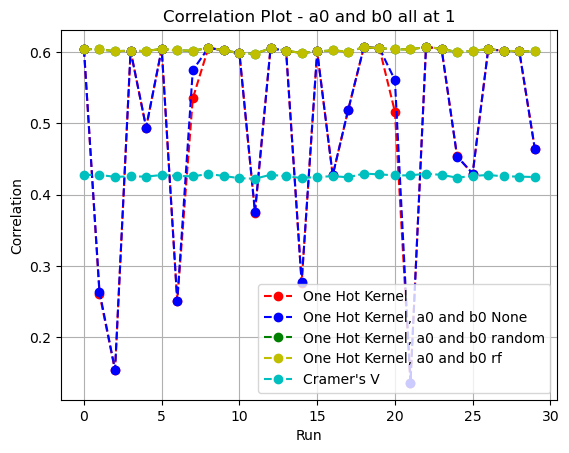

In [37]:
correlations = [res['correlation'] for res in results]
correlations_none = [res['correlation_none'] for res in results]
correlations_random = [res['correlation_random'] for res in results]
correlations_rf = [res['correlation_rf'] for res in results]
cramers = [res['cramers_v'] for res in results]

plt.plot(correlations, marker='o', linestyle='--', color='r', label='One Hot Kernel')
plt.plot(correlations_none, marker='o', linestyle='--', color='b', label='One Hot Kernel, a0 and b0 None')
plt.plot(correlations_random, marker='o', linestyle='--', color='g', label='One Hot Kernel, a0 and b0 random')
plt.plot(correlations_rf, marker='o', linestyle='--', color='y', label='One Hot Kernel, a0 and b0 rf')
plt.plot(cramers, marker='o', linestyle='--', color='c', label='Cramer\'s V')
plt.title('Correlation Plot - a0 and b0 all at 1')
plt.xlabel('Run')
plt.ylabel('Correlation')
plt.legend()
plt.grid(True)
plt.show()

Beh, la maggior parte delle volte è coerente, ma a volte wiggela. Forse il problema è dovuto al fatto che l'ultima colonna è SEMPRE linearmente dipendente alle altre.

In [89]:
print(np.unique(result_vdmwr.a))

['Blood Angel' 'Dark Angel' 'Imperial Fist' 'Iron Hand' 'Raven Guard'
 'Salamander' 'Space Wolf' 'Ultramarine' 'White Scar']


In [90]:
print(np.unique(result_vdmwr.b))

['cat' 'dog' 'horse' 'monke']


## 2. Execution times

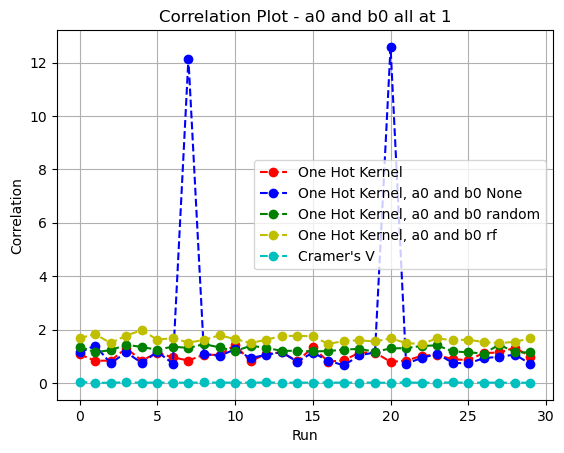

In [38]:
times = [res['time'] for res in results]
times_none = [res['time_none'] for res in results]
times_random = [res['time_random'] for res in results]
times_rf = [res['time_rf'] for res in results]
times_cramer = [res['time_cramer'] for res in results]

plt.plot(times, marker='o', linestyle='--', color='r', label='One Hot Kernel')
plt.plot(times_none, marker='o', linestyle='--', color='b', label='One Hot Kernel, a0 and b0 None')
plt.plot(times_random, marker='o', linestyle='--', color='g', label='One Hot Kernel, a0 and b0 random')
plt.plot(times_rf, marker='o', linestyle='--', color='y', label='One Hot Kernel, a0 and b0 rf')
plt.plot(times_cramer, marker='o', linestyle='--', color='c', label='Cramer\'s V')
plt.title('Correlation Plot - a0 and b0 all at 1')
plt.xlabel('Run')
plt.ylabel('Correlation')
plt.legend()
plt.grid(True)
plt.show()

## 3. Alphas plots

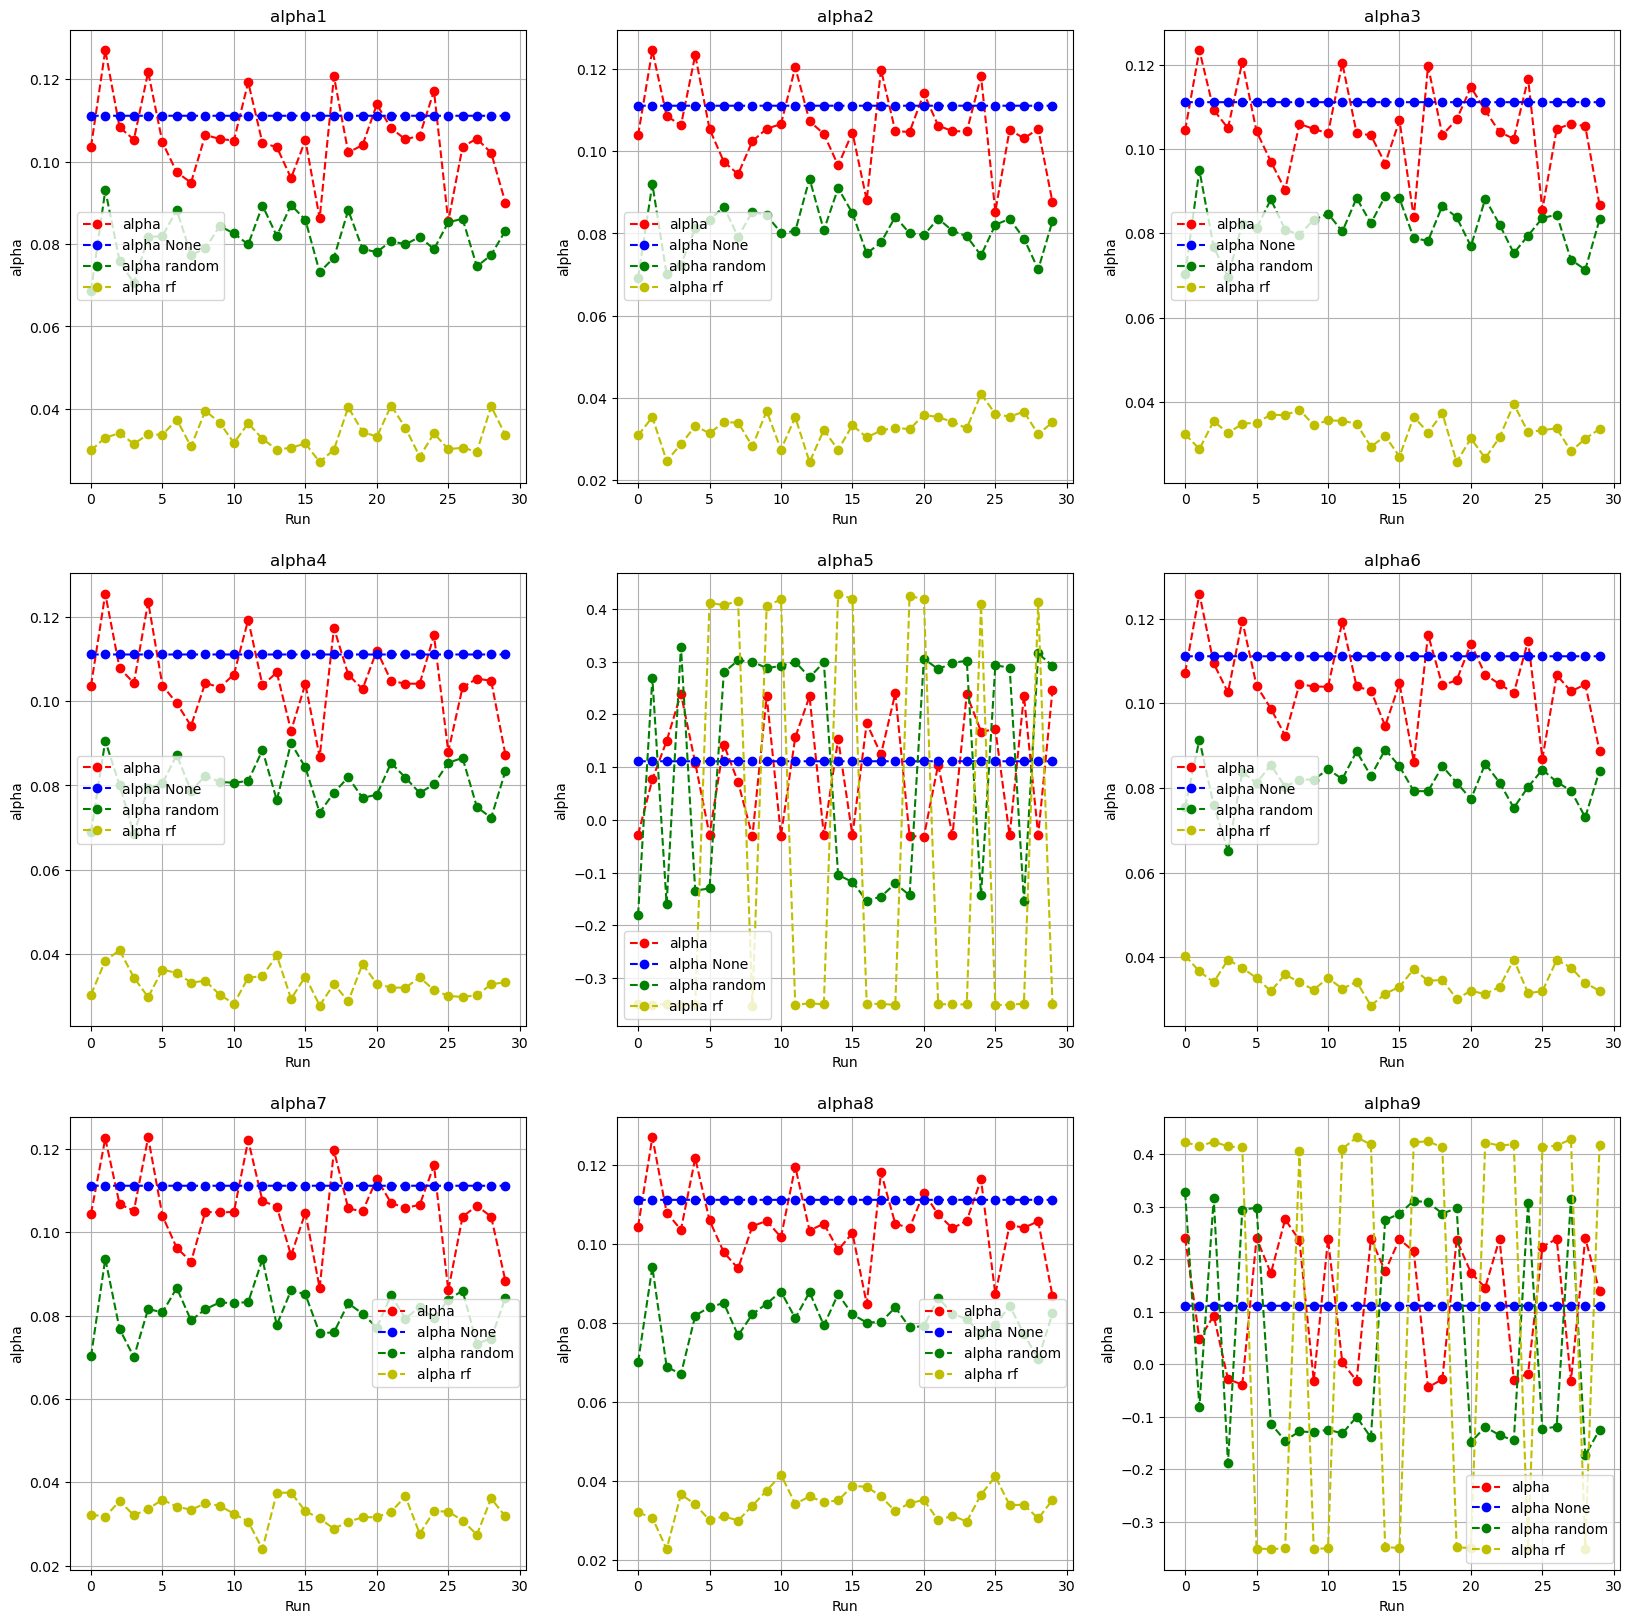

In [ ]:
plt.figure(figsize=(20, 20))

for i in range(9):

    alpha = [res['alpha'][i] for res in results]
    alpha_none = [res['alpha_none'][i] for res in results]
    alpha_random = [res['alpha_random'][i] for res in results]
    alpha_rf = [res['alpha_rf'][i] for res in results]

    plt.subplot(3, 3, i+1)

    plt.plot(alpha, marker='o', linestyle='--', color='r', label='alpha')
    plt.plot(alpha_none, marker='o', linestyle='--', color='b', label='alpha None')
    plt.plot(alpha_random, marker='o', linestyle='--', color='g', label='alpha random')
    plt.plot(alpha_rf, marker='o', linestyle='--', color='y', label='alpha rf')


    plt.title('alpha' + str(i+1))
    plt.xlabel('Run')
    plt.ylabel('alpha')
    plt.legend()
    plt.grid(True)

plt.show()

Quelle che wiggelano di più sono la quinta e la nona, Raven Guard and White Scar. Come mi aspettavo!

### Only a0, b0 random and rf

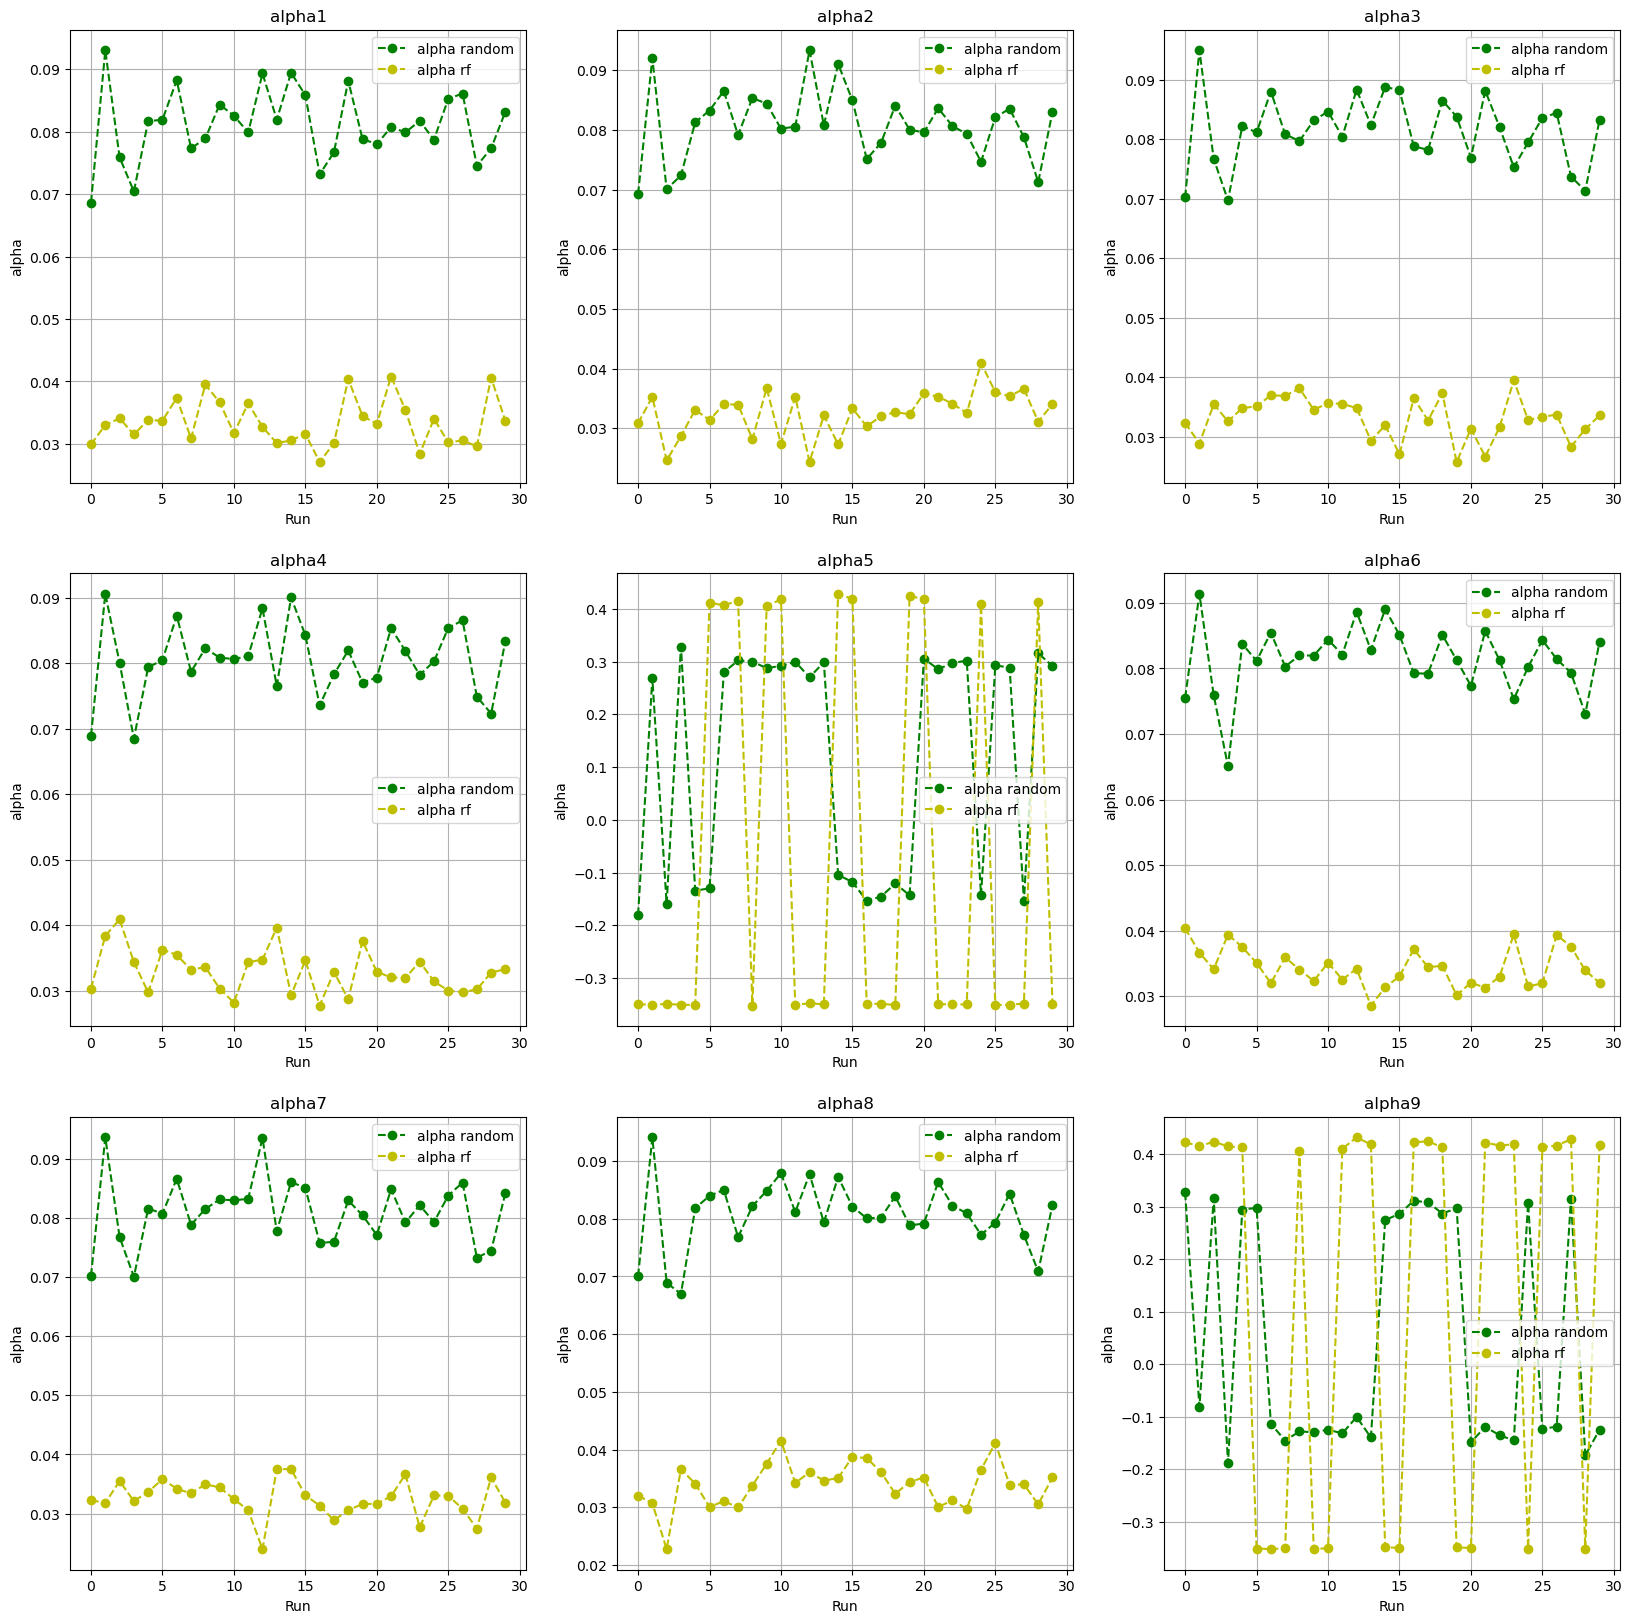

In [ ]:
plt.figure(figsize=(20, 20))

for i in range(9):

    alpha_random = [res['alpha_random'][i] for res in results]
    alpha_rf = [res['alpha_rf'][i] for res in results]

    plt.subplot(3, 3, i+1)

    plt.plot(alpha_random, marker='o', linestyle='--', color='g', label='alpha random')
    plt.plot(alpha_rf, marker='o', linestyle='--', color='y', label='alpha rf')

    plt.title('alpha' + str(i+1))
    plt.xlabel('Run')
    plt.ylabel('alpha')
    plt.legend()
    plt.grid(True)

plt.show()

## 4. Betas plots

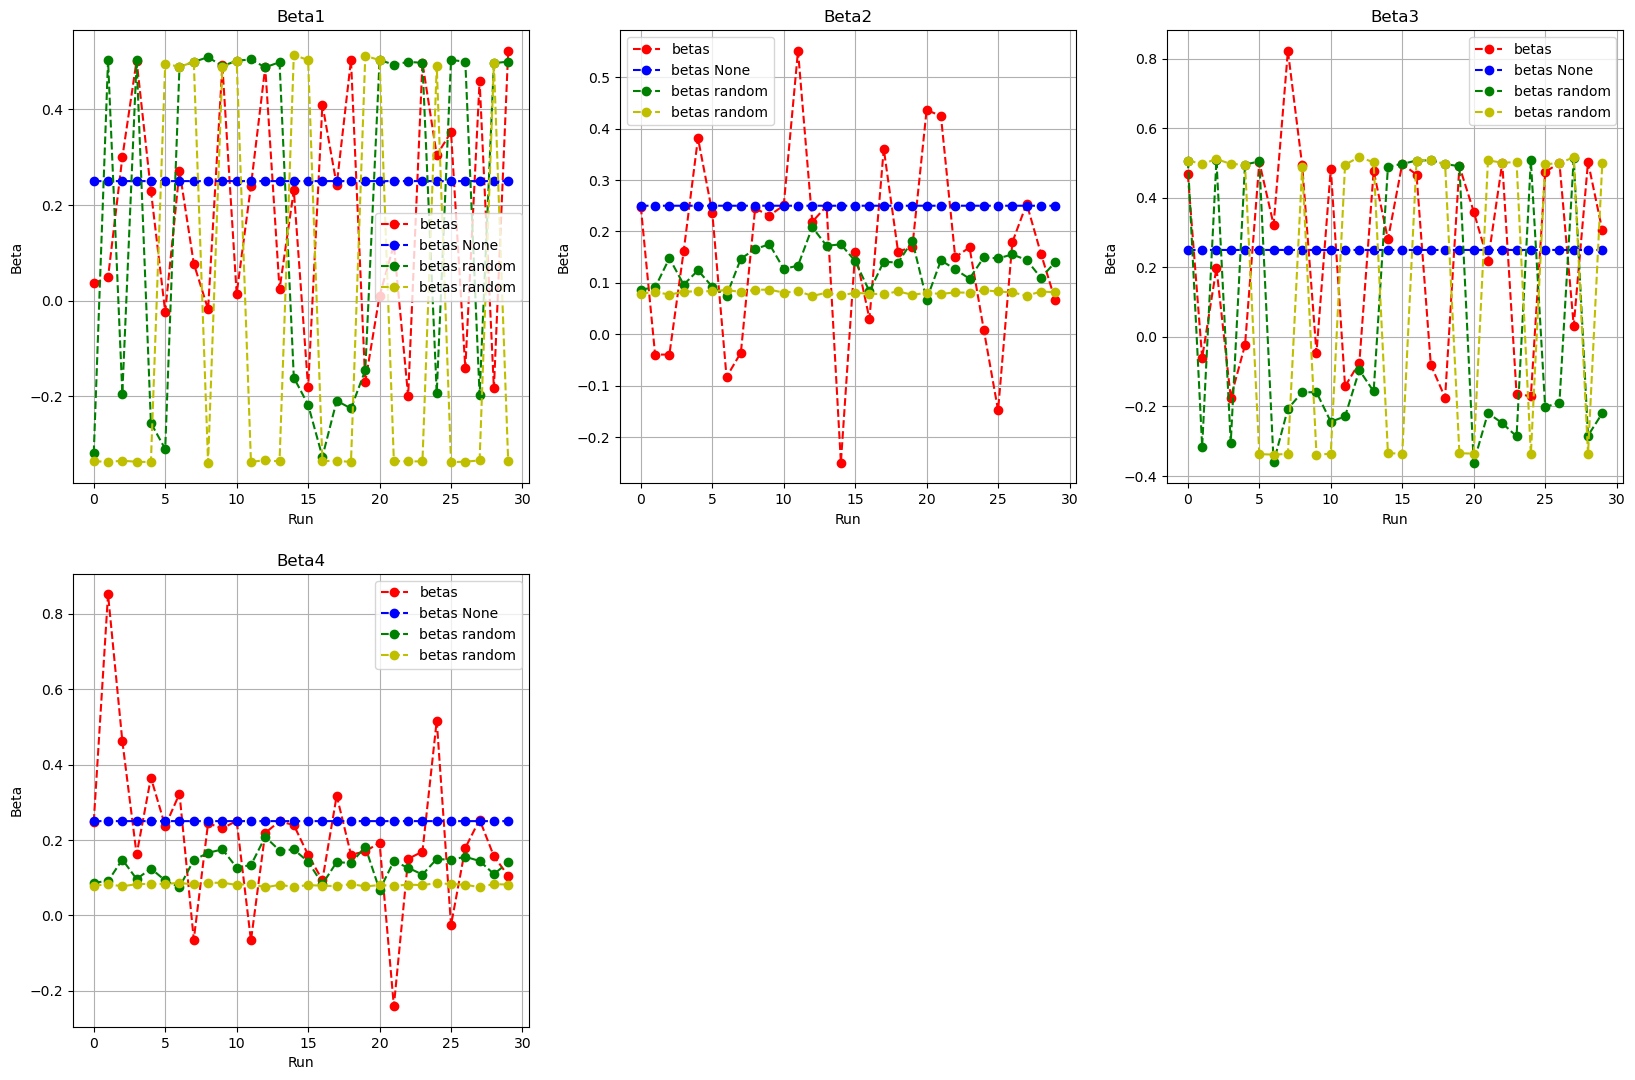

In [39]:
plt.figure(figsize=(20, 20))

for i in range(4):

    betas = [res['beta'][i] for res in results]
    betas_none = [res['beta_none'][i] for res in results]
    betas_random = [res['beta_random'][i] for res in results]
    betas_rf = [res['beta_rf'][i] for res in results]

    plt.subplot(3, 3, i+1)

    plt.plot(betas, marker='o', linestyle='--', color='r', label='betas')
    plt.plot(betas_none, marker='o', linestyle='--', color='b', label='betas None')
    plt.plot(betas_random, marker='o', linestyle='--', color='g', label='betas random')
    plt.plot(betas_rf, marker='o', linestyle='--', color='y', label='betas random')

    plt.title('Beta' + str(i+1))
    plt.xlabel('Run')
    plt.ylabel('Beta')
    plt.legend()
    plt.grid(True)

plt.show()

Quelle che wiggelano di più sono la prima e la terza, horse and cat. Come mi aspettavo!

### Only a0, b0 random and rf

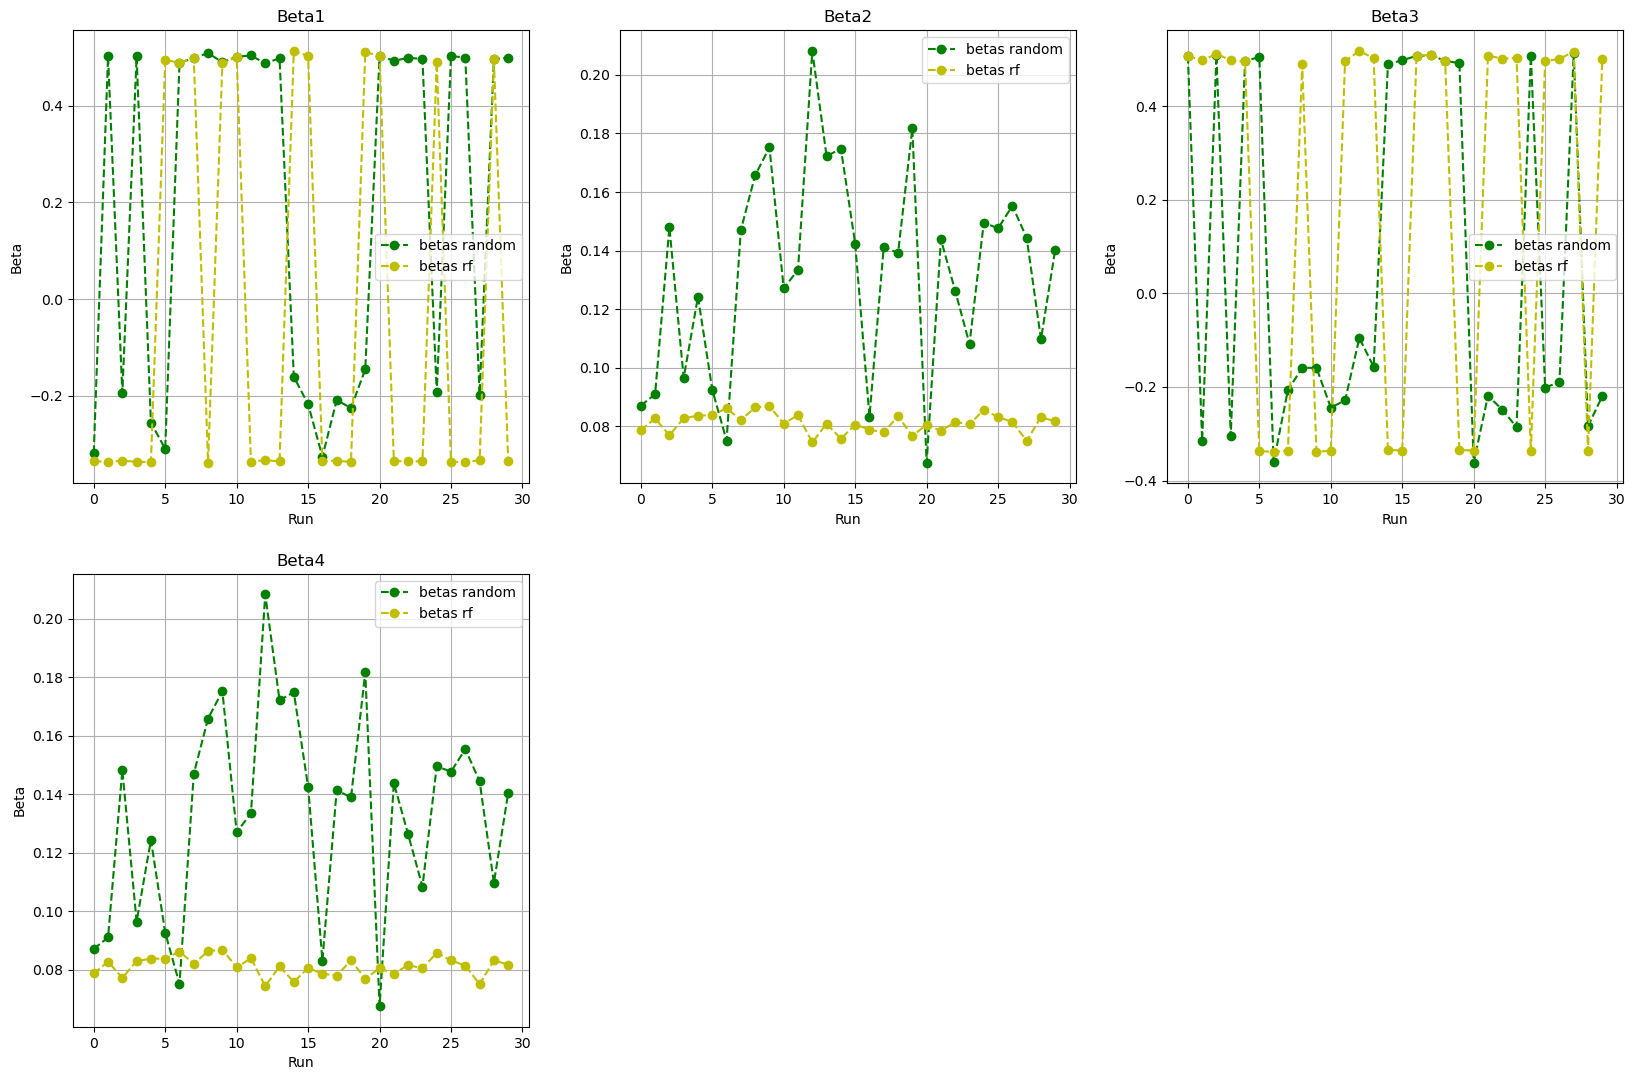

In [43]:
plt.figure(figsize=(20, 20))

for i in range(4):

    betas_random = [res['beta_random'][i] for res in results]
    betas_rf = [res['beta_rf'][i] for res in results]

    plt.subplot(3, 3, i+1)

    plt.plot(betas_random, marker='o', linestyle='--', color='g', label='betas random')
    plt.plot(betas_rf, marker='o', linestyle='--', color='y', label='betas rf')

    plt.title('Beta' + str(i+1))
    plt.xlabel('Run')
    plt.ylabel('Beta')
    plt.legend()
    plt.grid(True)

plt.show()

# 1. What happens if we eliminate linear dependent column using the 'delta_independent' parameter?

In [9]:
my_kernel_one_hot_with_delta = DoubleKernelHGR(
    backend=backend,          # Or any other appropriate backend
    kernel_a=one_hot_encode, # Custom kernel function for variable a
    kernel_b=one_hot_encode, # Custom kernel function for variable b
    delta_independent=0.2
)

In [10]:
results = []

for i in range(30):

    ani_i = []
    war_i = []
    res_i = {}

    for i in range(50000):
        
        warrior=sample(warriors)

        war_i.append(warrior)

        if warrior == "Ultramarine":
            anim = "horse"
        elif warrior == "Raven Guard":
            anim="cat"
        else:
            anim = sample(animals)

        ani_i.append(anim)

    result_i = my_kernel_one_hot_with_delta._result(war_i, ani_i, kernel_a=True, kernel_b=True, a0=np.ones(9), b0=np.ones(4))

    result_i_none = my_kernel_one_hot_with_delta._result(war_i, ani_i, kernel_a=True, kernel_b=True, a0=None, b0=None)

    confusion_matrix = pd.crosstab(war_i, ani_i)

    res_i['correlation'] = result_i.value
    res_i['alpha'] = result_i.alpha
    res_i['beta'] = result_i.beta

    res_i['correlation_none'] = result_i_none.value
    res_i['alpha_none'] = result_i_none.alpha
    res_i['beta_none'] = result_i_none.beta

    res_i['cramers_v'] = cramers_v(confusion_matrix.values)
    res_i['vanilla_cramer'] = vanilla_cramers_v(confusion_matrix.values)

    results.append(res_i)

## Plot correlations 

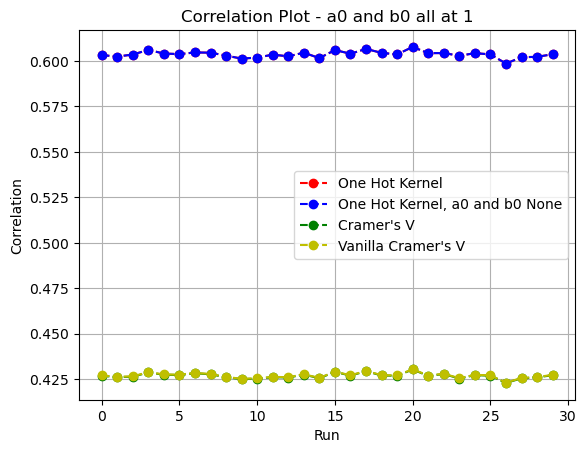

In [11]:
correlations = [res['correlation'] for res in results]
correlations_none = [res['correlation_none'] for res in results]
cramers = [res['cramers_v'] for res in results]
vanilla_cramers = [res['vanilla_cramer'] for res in results]

plt.plot(correlations, marker='o', linestyle='--', color='r', label='One Hot Kernel')
plt.plot(correlations_none, marker='o', linestyle='--', color='b', label='One Hot Kernel, a0 and b0 None')
plt.plot(cramers, marker='o', linestyle='--', color='g', label='Cramer\'s V')
plt.plot(vanilla_cramers, marker='o', linestyle='--', color='y', label='Vanilla Cramer\'s V')
plt.title('Correlation Plot - a0 and b0 all at 1')
plt.xlabel('Run')
plt.ylabel('Correlation')
plt.legend()
plt.grid(True)
plt.show()

WOW, il delta_independent ha svoltato la serata, ora la correlation calcolata è MOLTO più stabile!!

## Plot Betas vs Beta none

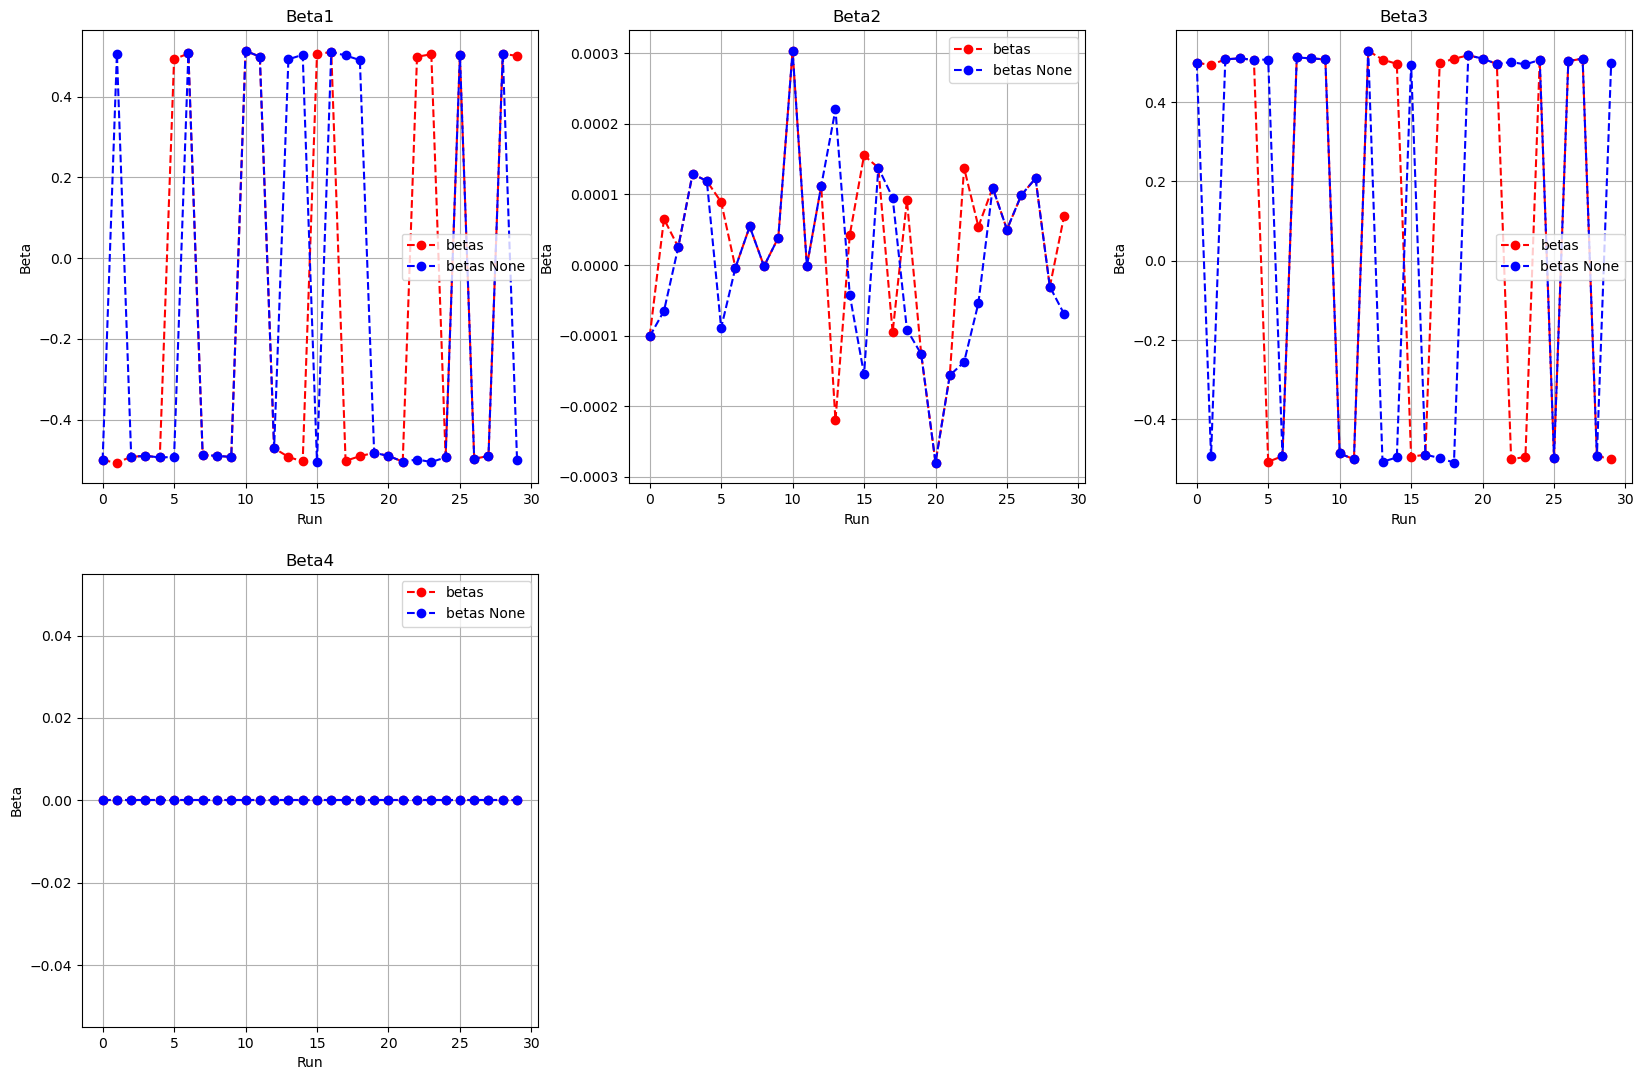

In [14]:
plt.figure(figsize=(20, 20))

for i in range(4):

    betas = [res['beta'][i] for res in results]
    betas_none = [res['beta_none'][i] for res in results]

    plt.subplot(3, 3, i+1)

    plt.plot(betas, marker='o', linestyle='--', color='r', label='betas')
    plt.plot(betas_none, marker='o', linestyle='--', color='b', label='betas None')

    plt.title('Beta' + str(i+1))
    plt.xlabel('Run')
    plt.ylabel('Beta')
    plt.legend()
    plt.grid(True)

plt.show()

La prima e la terza, quelle più "correlate", sono le più lontane dallo 0. La seconda è sempre intorno a 0 e la quarta è sempre a zero dato che è dipendente dalle altre.

## Plot Alpha vs Alpha none

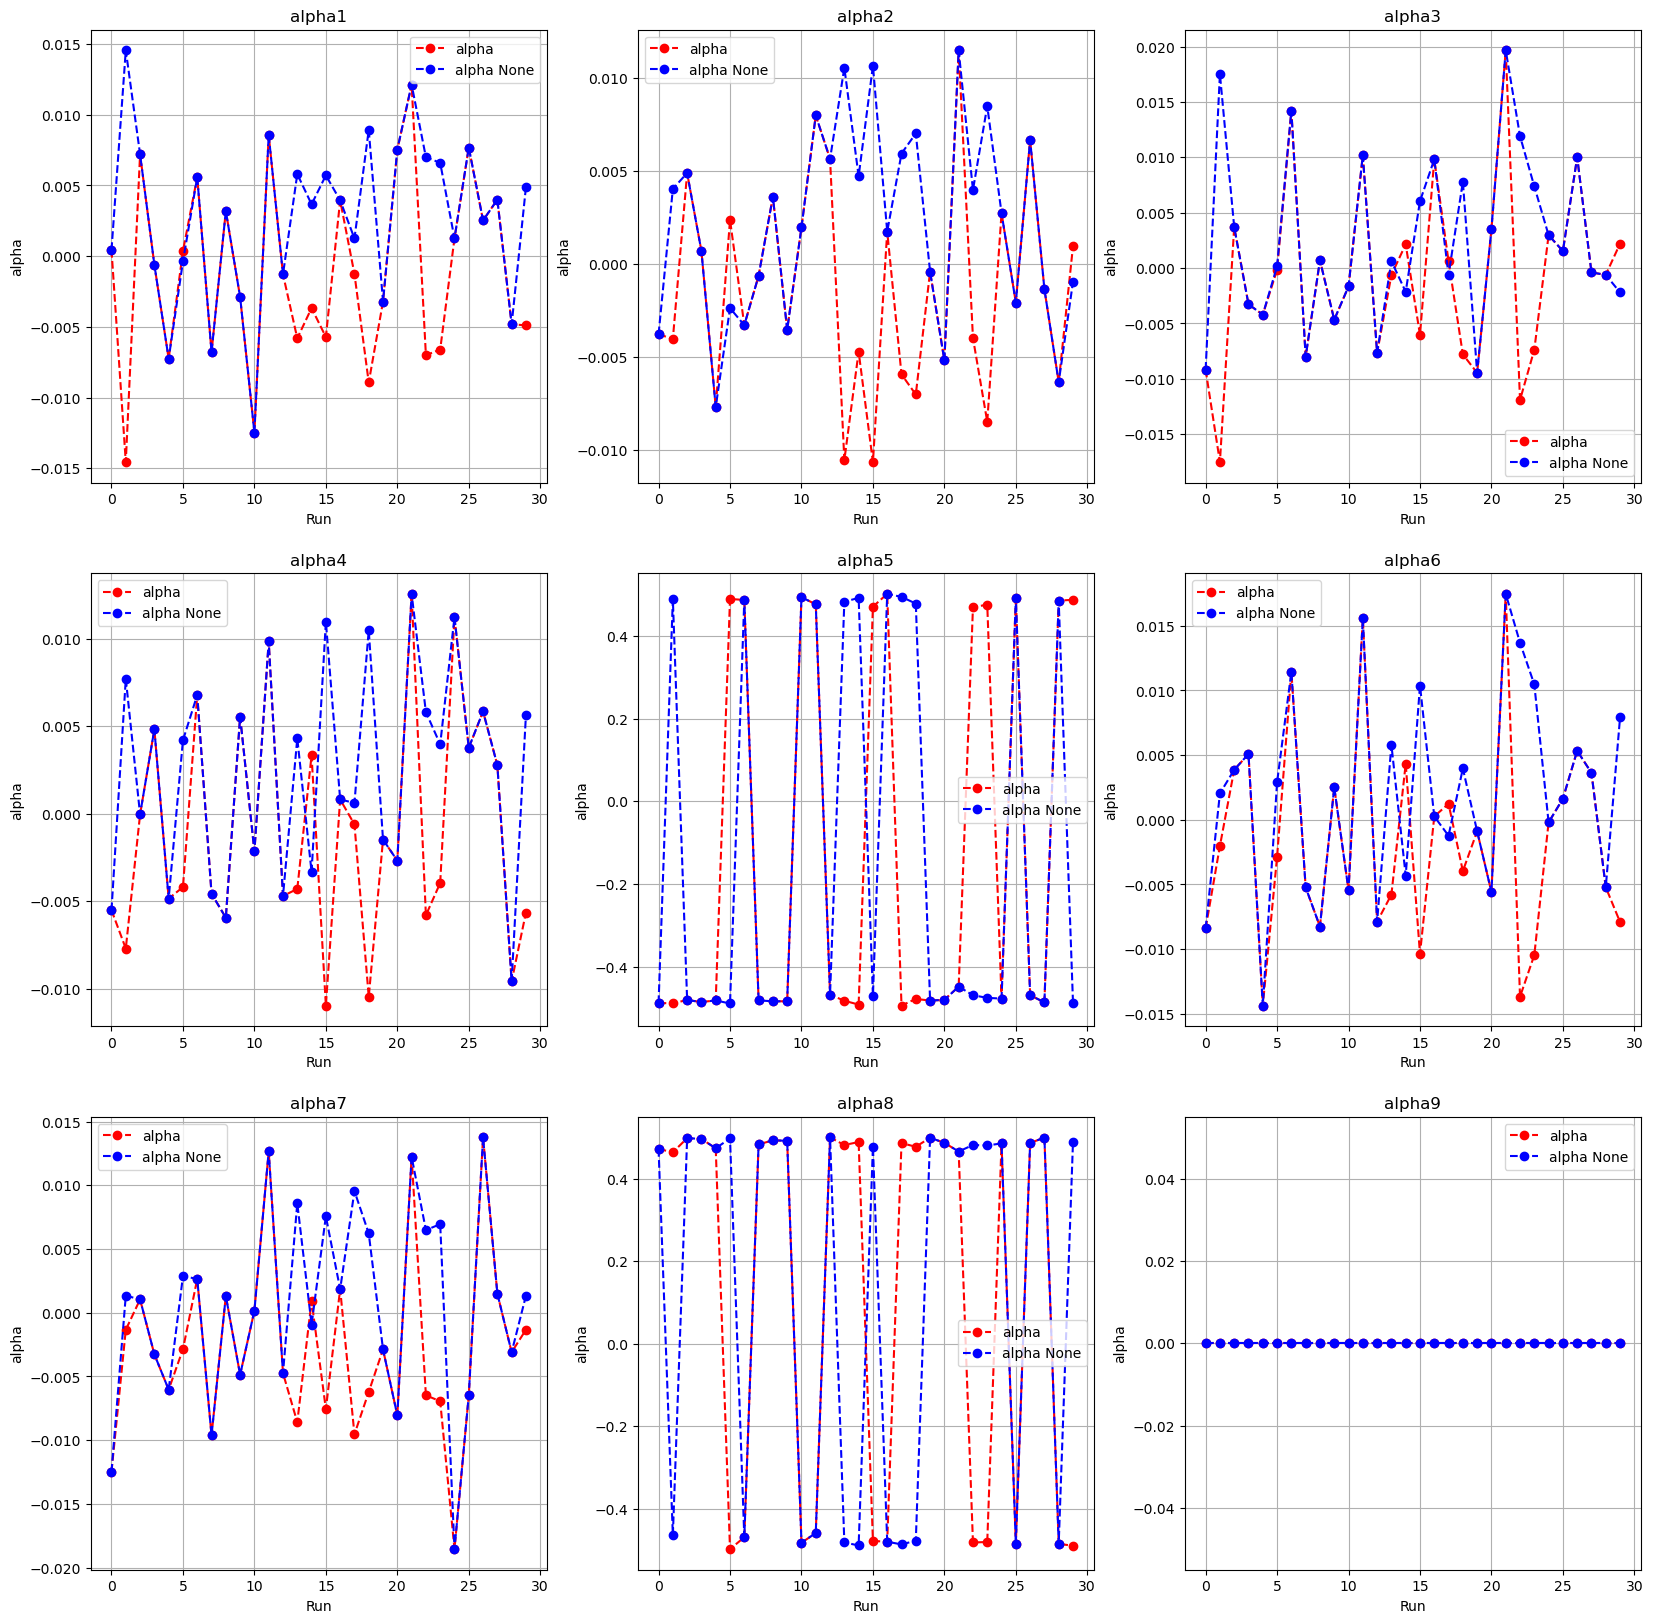

In [15]:
plt.figure(figsize=(20, 20))

for i in range(9):

    alpha = [res['alpha'][i] for res in results]
    alpha_none = [res['alpha_none'][i] for res in results]

    plt.subplot(3, 3, i+1)

    plt.plot(alpha, marker='o', linestyle='--', color='r', label='alpha')
    plt.plot(alpha_none, marker='o', linestyle='--', color='b', label='alpha None')

    plt.title('alpha' + str(i+1))
    plt.xlabel('Run')
    plt.ylabel('alpha')
    plt.legend()
    plt.grid(True)

plt.show()

La quinta, quella della Raven Guard, è sensibilmente più alta delle altre (il doppio), come ci aspettavamo!! Il problema è che l'ultima alpha, essendo l'ultima colonna linearmente dipendente dalle altre, è sempre a 0. In questo caso ciò è un problema dato che l'ultima colonna è relativa alla White Scar, che è correlata a horse e che quindi avrebbe molto probabilmente avuto un valore lontano da quello standard. Come risolvere il problema?

POSSIBILE SOLUZIONE: ????

# 2. Categorical e Numerical insieme

In [28]:
one_hot_and_num = DoubleKernelHGR(
    backend=backend,          # Or any other appropriate backend
    kernel_a=one_hot_encode, # Custom kernel function for variable a
    kernel_b=2, # Custom kernel function for variable b
    delta_independent=0.2
)

In [29]:
results = []

for i in range(30):

    num_i = []
    war_i = []
    res_i = {}

    for i in range(50000):
        
        warrior=sample(warriors)

        war_i.append(warrior)

        if warrior == "Ultramarine":
            num = 13
        elif warrior == "Raven Guard":
            num = 19
        else:
            num = rn.randint(1, 20)

        num_i.append(num)

    result_i = one_hot_and_num._result(war_i, num_i, kernel_a=True, kernel_b=True, a0=np.ones(9), b0=np.ones(4))

    result_i_none = one_hot_and_num._result(war_i, num_i, kernel_a=True, kernel_b=True, a0=None, b0=None)

    confusion_matrix = pd.crosstab(war_i, num_i)

    res_i['correlation'] = result_i.value
    res_i['alpha'] = result_i.alpha
    res_i['beta'] = result_i.beta

    res_i['correlation_none'] = result_i_none.value
    res_i['alpha_none'] = result_i_none.alpha
    res_i['beta_none'] = result_i_none.beta

    res_i['cramers_v'] = cramers_v(confusion_matrix.values)

    results.append(res_i)

## Plot correlations 

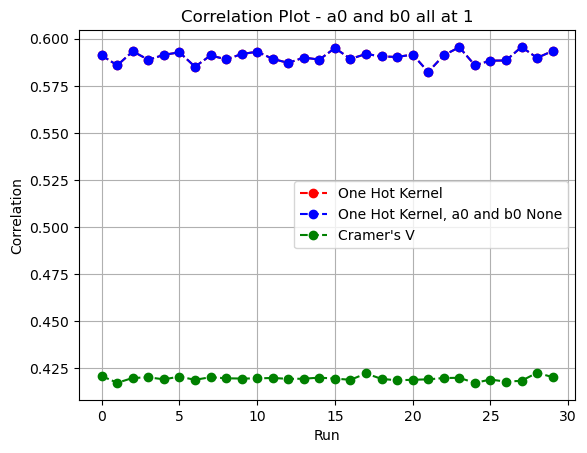

In [30]:
correlations = [res['correlation'] for res in results]
correlations_none = [res['correlation_none'] for res in results]
cramers = [res['cramers_v'] for res in results]

plt.plot(correlations, marker='o', linestyle='--', color='r', label='One Hot Kernel')
plt.plot(correlations_none, marker='o', linestyle='--', color='b', label='One Hot Kernel, a0 and b0 None')
plt.plot(cramers, marker='o', linestyle='--', color='g', label='Cramer\'s V')
plt.title('Correlation Plot - a0 and b0 all at 1')
plt.xlabel('Run')
plt.ylabel('Correlation')
plt.legend()
plt.grid(True)
plt.show()

## Plot Betas vs Beta none

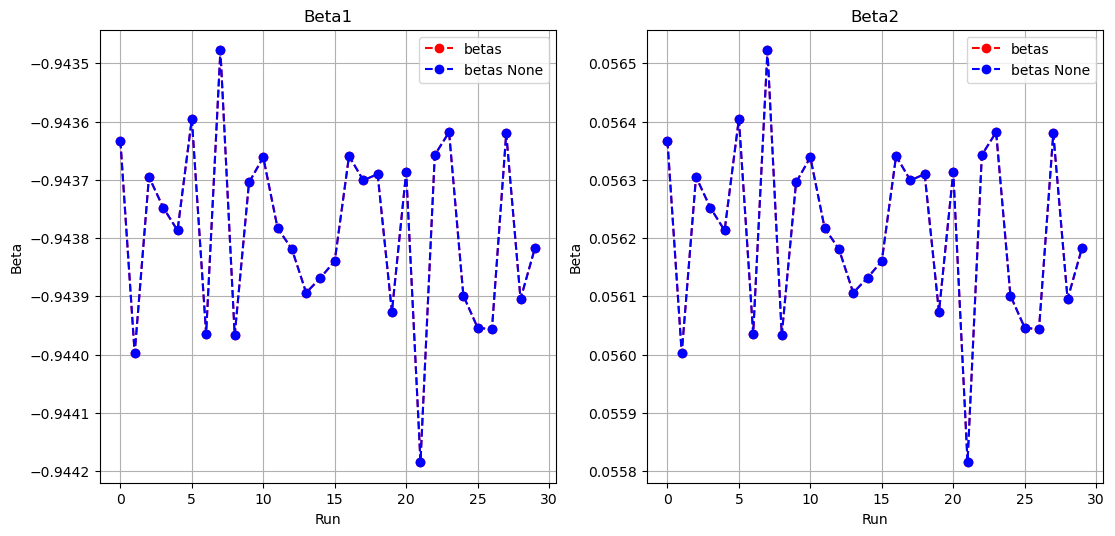

In [31]:
plt.figure(figsize=(20, 20))

for i in range(2):

    betas = [res['beta'][i] for res in results]
    betas_none = [res['beta_none'][i] for res in results]

    plt.subplot(3, 3, i+1)

    plt.plot(betas, marker='o', linestyle='--', color='r', label='betas')
    plt.plot(betas_none, marker='o', linestyle='--', color='b', label='betas None')

    plt.title('Beta' + str(i+1))
    plt.xlabel('Run')
    plt.ylabel('Beta')
    plt.legend()
    plt.grid(True)

plt.show()

## Plot Alpha vs Alpha none

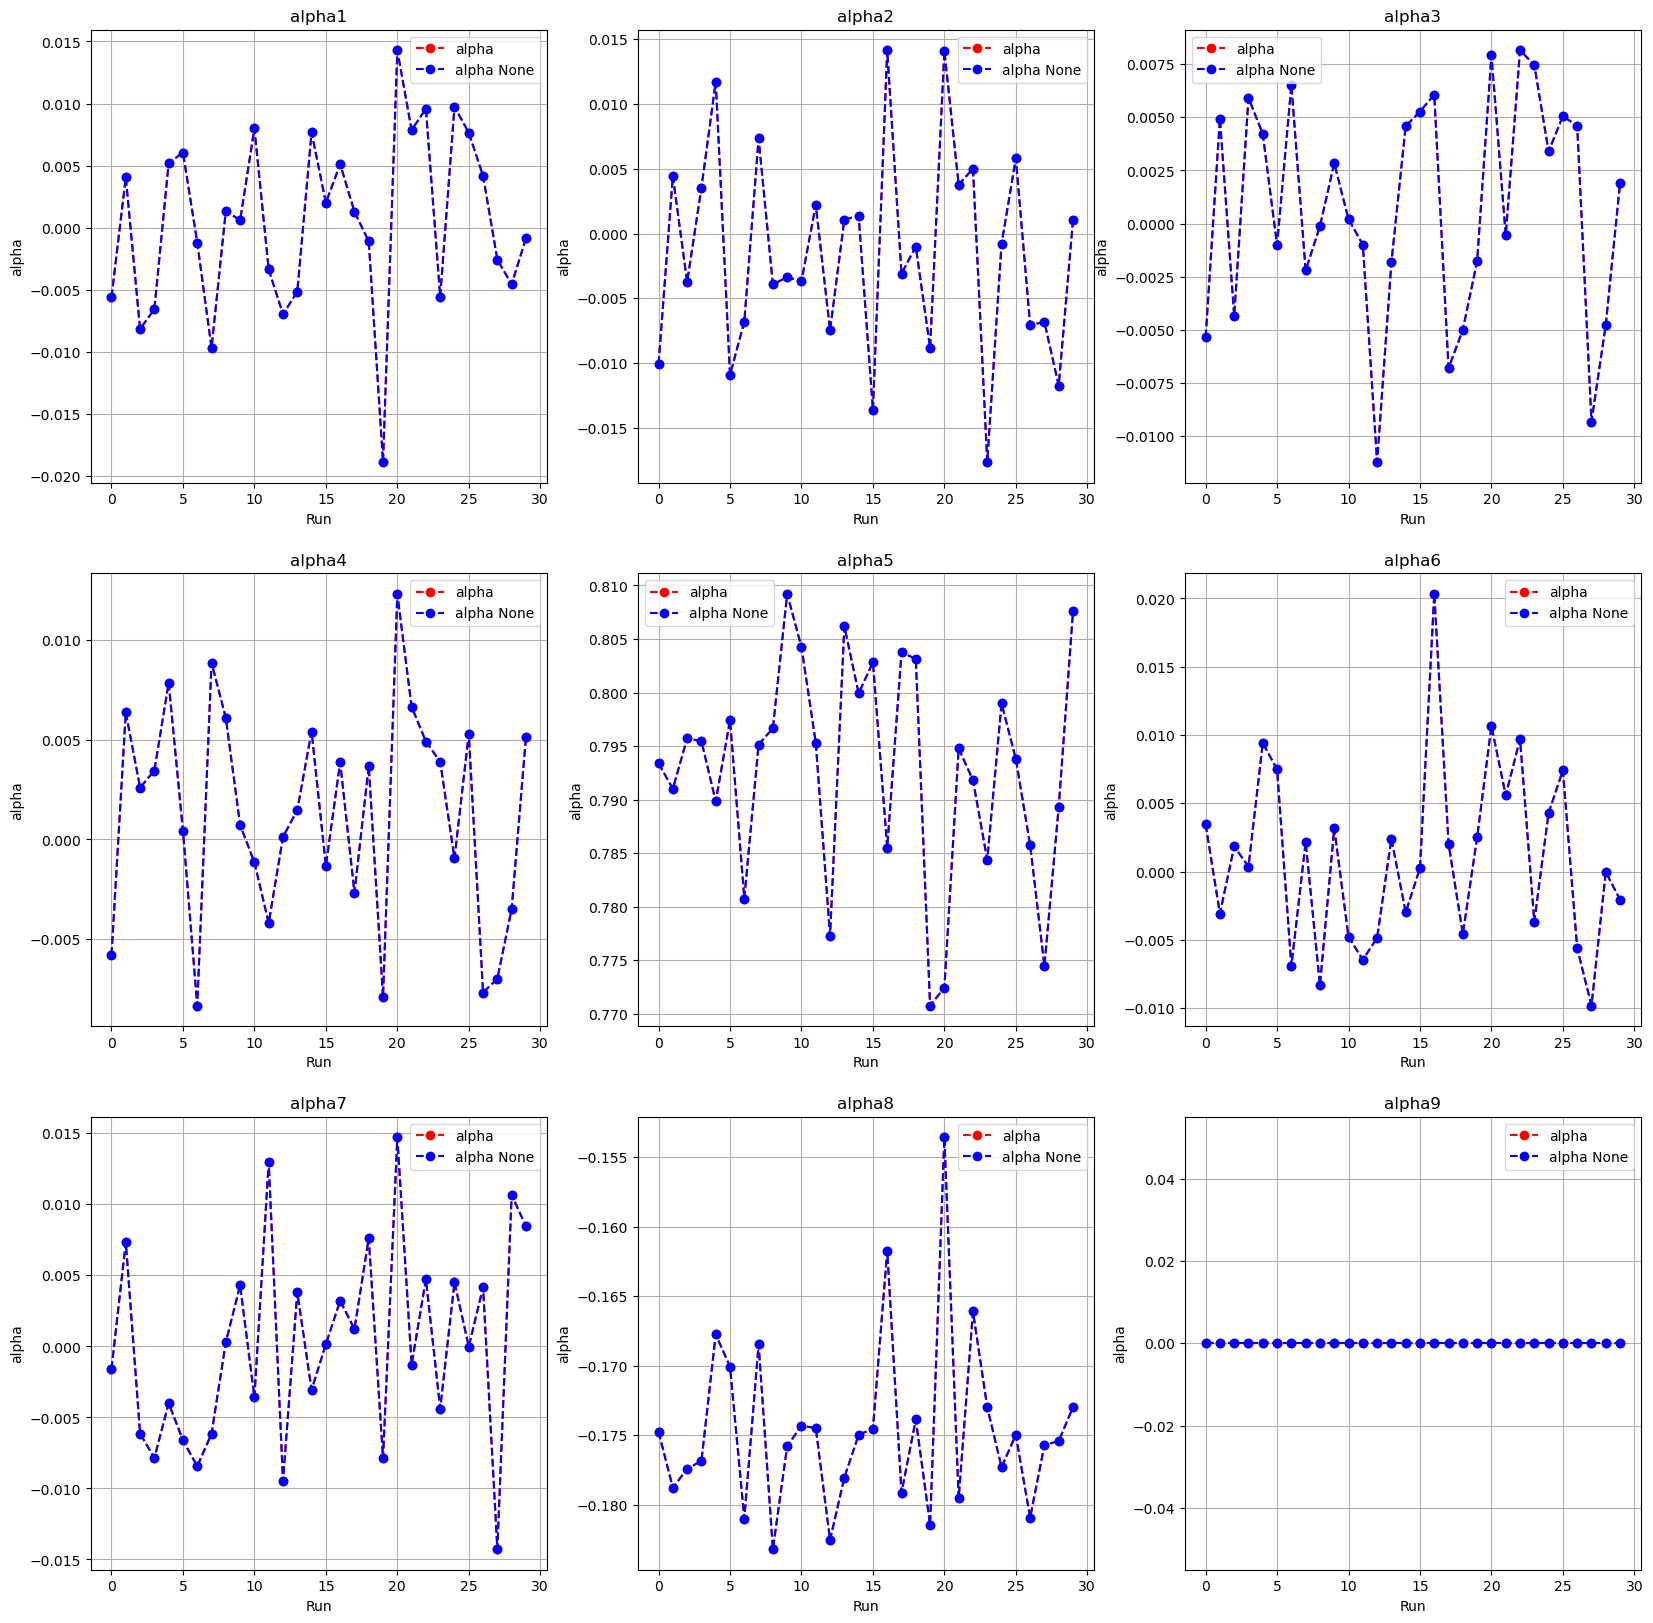

In [32]:
plt.figure(figsize=(20, 20))

for i in range(9):

    alpha = [res['alpha'][i] for res in results]
    alpha_none = [res['alpha_none'][i] for res in results]

    plt.subplot(3, 3, i+1)

    plt.plot(alpha, marker='o', linestyle='--', color='r', label='alpha')
    plt.plot(alpha_none, marker='o', linestyle='--', color='b', label='alpha None')

    plt.title('alpha' + str(i+1))
    plt.xlabel('Run')
    plt.ylabel('alpha')
    plt.legend()
    plt.grid(True)

plt.show()

# 3. Performance all'aumentare del "noise"

In [51]:
results = []

for i in range(30):

    ani_i = []
    war_i = []
    res_i = {}

    for j in range(50000):
        
        warrior=sample(warriors)

        war_i.append(warrior)

        if warrior == "Ultramarine":
            if rn.randint(1,29) > i:  
                anim = sample(animals)
            else:                  
                anim = "horse"
        elif warrior == "Raven Guard":
            if rn.randint(1,29) > i:  
                anim = sample(animals)
            else:     
                anim="cat"
        else:
            anim = sample(animals)

        ani_i.append(anim)

    result_i = my_kernel_one_hot_with_delta._result(war_i, ani_i, kernel_a=True, kernel_b=True, a0=np.ones(9), b0=np.ones(4))

    result_i_none = my_kernel_one_hot_with_delta._result(war_i, ani_i, kernel_a=True, kernel_b=True, a0=None, b0=None)

    confusion_matrix = pd.crosstab(war_i, ani_i)

    res_i['correlation'] = result_i.value
    res_i['alpha'] = result_i.alpha
    res_i['beta'] = result_i.beta

    res_i['correlation_none'] = result_i_none.value
    res_i['alpha_none'] = result_i_none.alpha
    res_i['beta_none'] = result_i_none.beta

    res_i['cramers_v'] = cramers_v(confusion_matrix.values)

    results.append(res_i)

## Plot correlations 

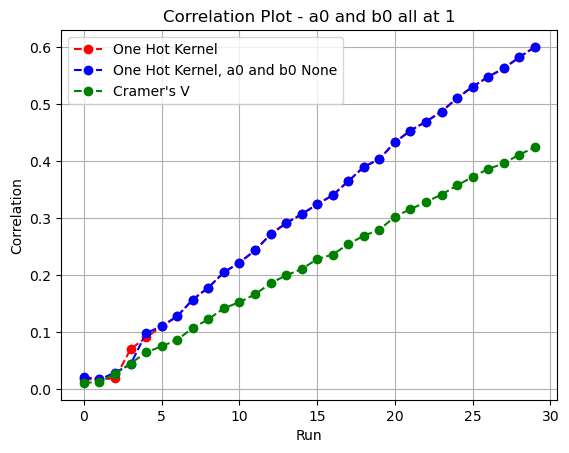

In [52]:
correlations = [res['correlation'] for res in results]
correlations_none = [res['correlation_none'] for res in results]
cramers = [res['cramers_v'] for res in results]

plt.plot(correlations, marker='o', linestyle='--', color='r', label='One Hot Kernel')
plt.plot(correlations_none, marker='o', linestyle='--', color='b', label='One Hot Kernel, a0 and b0 None')
plt.plot(cramers, marker='o', linestyle='--', color='g', label='Cramer\'s V')
plt.title('Correlation Plot - a0 and b0 all at 1')
plt.xlabel('Run')
plt.ylabel('Correlation')
plt.legend()
plt.grid(True)
plt.show()

## Plot Betas vs Beta none

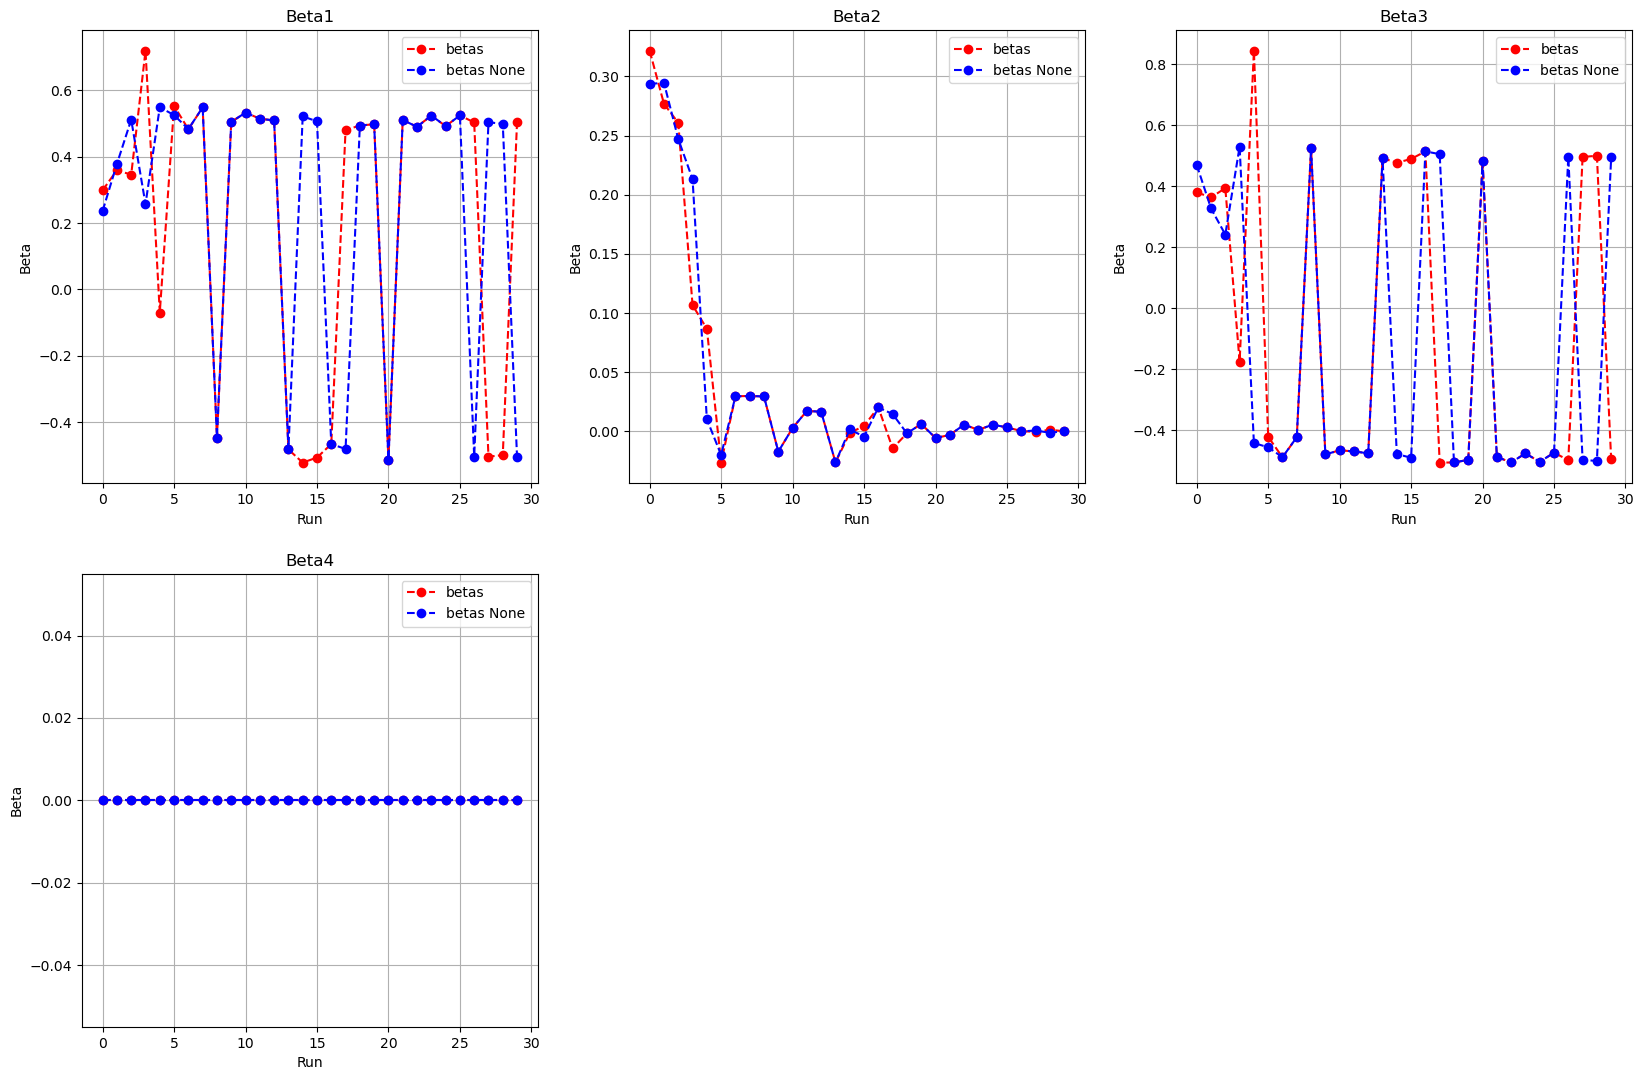

In [53]:
plt.figure(figsize=(20, 20))

for i in range(4):

    betas = [res['beta'][i] for res in results]
    betas_none = [res['beta_none'][i] for res in results]

    plt.subplot(3, 3, i+1)

    plt.plot(betas, marker='o', linestyle='--', color='r', label='betas')
    plt.plot(betas_none, marker='o', linestyle='--', color='b', label='betas None')

    plt.title('Beta' + str(i+1))
    plt.xlabel('Run')
    plt.ylabel('Beta')
    plt.legend()
    plt.grid(True)

plt.show()

## Plot Alpha vs Alpha none

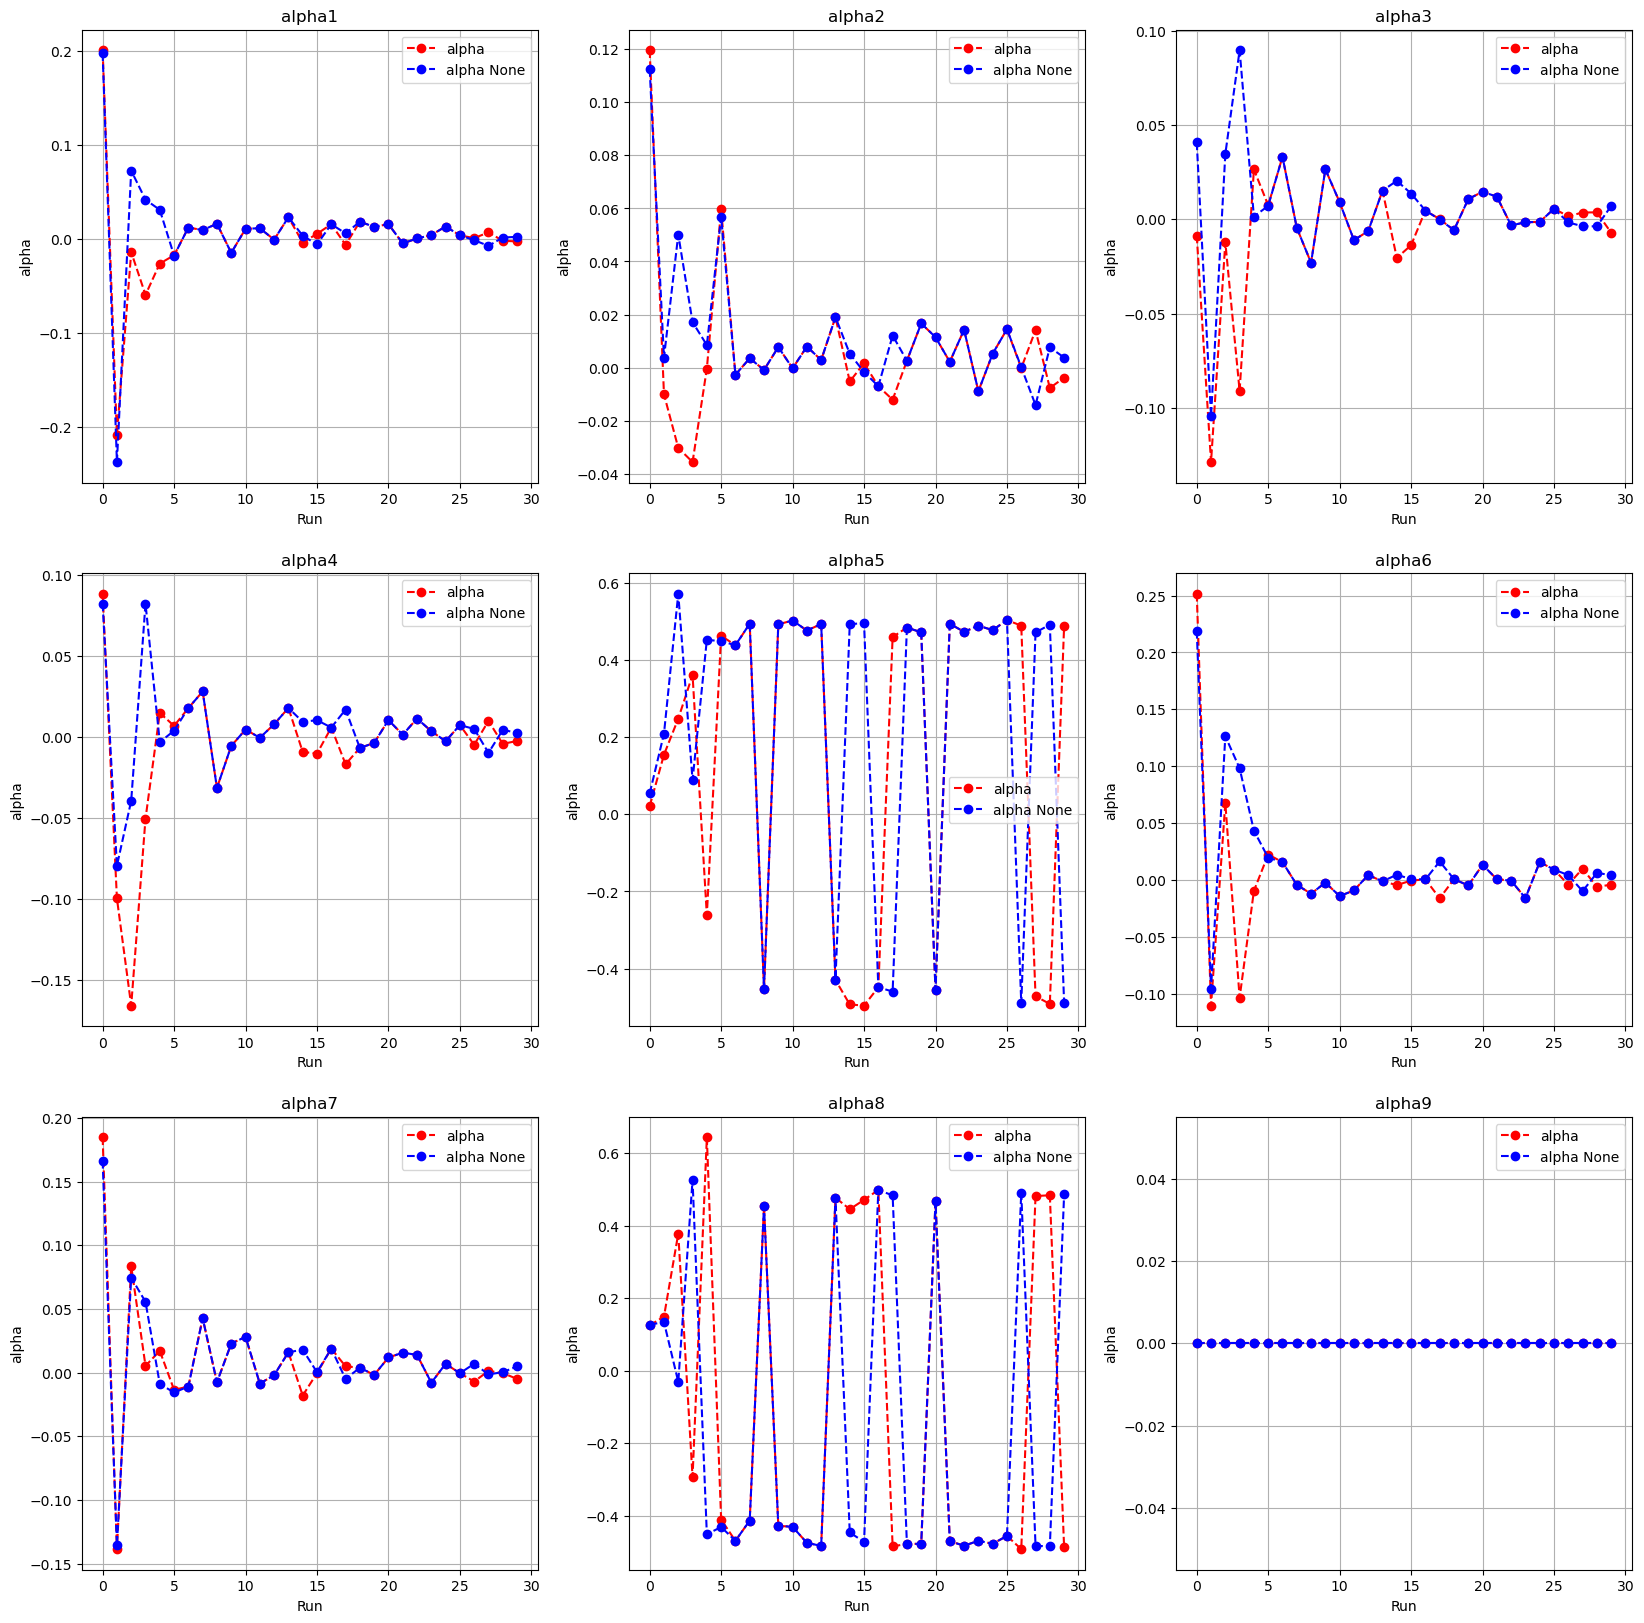

In [54]:
plt.figure(figsize=(20, 20))

for i in range(9):

    alpha = [res['alpha'][i] for res in results]
    alpha_none = [res['alpha_none'][i] for res in results]

    plt.subplot(3, 3, i+1)

    plt.plot(alpha, marker='o', linestyle='--', color='r', label='alpha')
    plt.plot(alpha_none, marker='o', linestyle='--', color='b', label='alpha None')

    plt.title('alpha' + str(i+1))
    plt.xlabel('Run')
    plt.ylabel('alpha')
    plt.legend()
    plt.grid(True)

plt.show()

# 4. Let's bring the correlation up to 11 (i mean 1)

In [74]:
results = []

for i in range(30):

    ani_i = []
    war_i = []
    res_i = {}

    for j in range(50000):
        
        warrior=sample(["Ultramarine", "Raven Guard"])

        war_i.append(warrior)

        if warrior == "Ultramarine":
            if rn.randint(1,29) > i:  
                anim = sample(animals)
            else:                  
                anim = "horse"
        elif warrior == "Raven Guard":
            if rn.randint(1,29) > i:  
                anim = sample(animals)
            else:     
                anim="cat"
        else:
            anim = sample(animals)

        ani_i.append(anim)

    result_i = my_kernel_one_hot_with_delta._result(war_i, ani_i, kernel_a=True, kernel_b=True, a0=np.ones(9), b0=np.ones(4))

    result_i_none = my_kernel_one_hot_with_delta._result(war_i, ani_i, kernel_a=True, kernel_b=True, a0=None, b0=None)

    confusion_matrix = pd.crosstab(war_i, ani_i)

    res_i['correlation'] = result_i.value
    res_i['alpha'] = result_i.alpha
    res_i['beta'] = result_i.beta

    res_i['correlation_none'] = result_i_none.value
    res_i['alpha_none'] = result_i_none.alpha
    res_i['beta_none'] = result_i_none.beta

    res_i['cramers_v'] = cramers_v(confusion_matrix.values)

    results.append(res_i)

## Plot correlations 

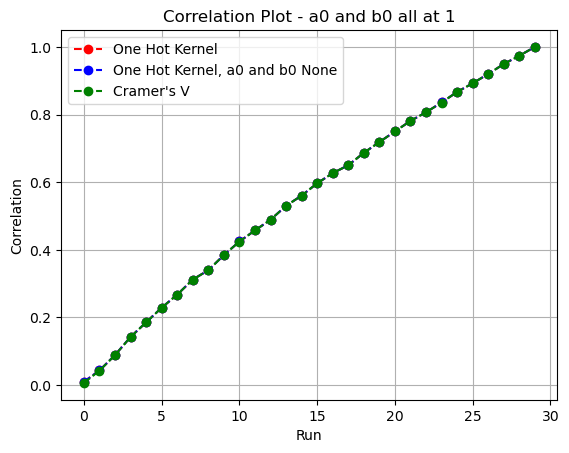

In [75]:
correlations = [res['correlation'] for res in results]
correlations_none = [res['correlation_none'] for res in results]
cramers = [res['cramers_v'] for res in results]

plt.plot(correlations, marker='o', linestyle='--', color='r', label='One Hot Kernel')
plt.plot(correlations_none, marker='o', linestyle='--', color='b', label='One Hot Kernel, a0 and b0 None')
plt.plot(cramers, marker='o', linestyle='--', color='g', label='Cramer\'s V')
plt.title('Correlation Plot - a0 and b0 all at 1')
plt.xlabel('Run')
plt.ylabel('Correlation')
plt.legend()
plt.grid(True)
plt.show()

## Plot Betas vs Beta none

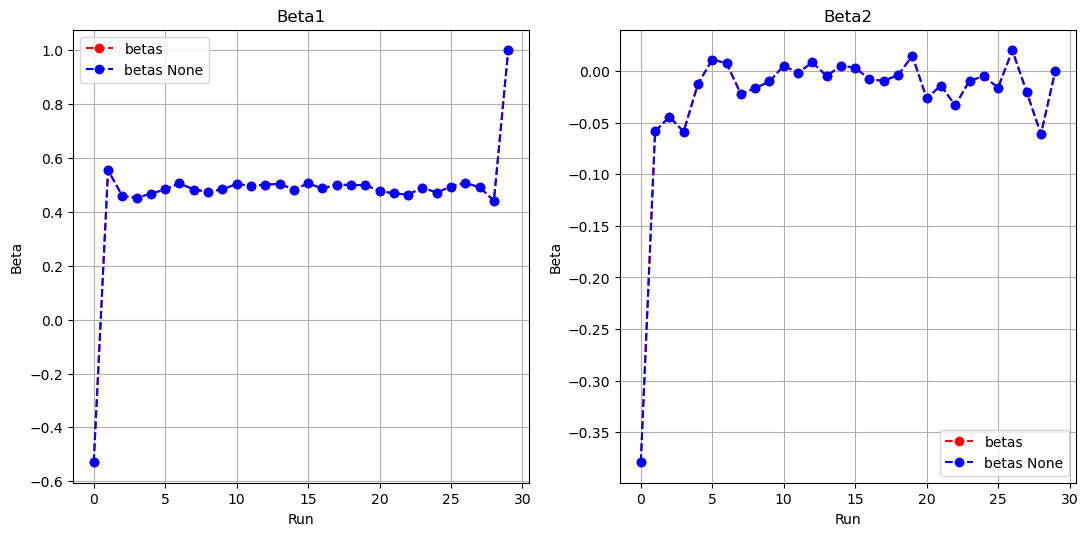

In [80]:
plt.figure(figsize=(20, 20))

for i in range(2):

    betas = [res['beta'][i] for res in results]
    betas_none = [res['beta_none'][i] for res in results]

    plt.subplot(3, 3, i+1)

    plt.plot(betas, marker='o', linestyle='--', color='r', label='betas')
    plt.plot(betas_none, marker='o', linestyle='--', color='b', label='betas None')

    plt.title('Beta' + str(i+1))
    plt.xlabel('Run')
    plt.ylabel('Beta')
    plt.legend()
    plt.grid(True)

plt.show()

## Plot Alpha vs Alpha none

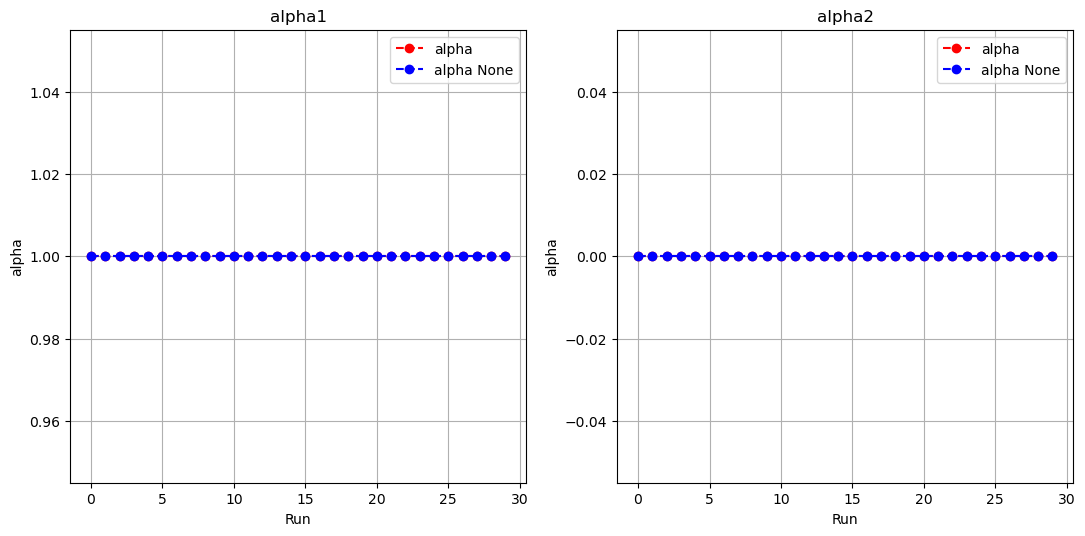

In [82]:
plt.figure(figsize=(20, 20))

for i in range(2):

    alpha = [res['alpha'][i] for res in results]
    alpha_none = [res['alpha_none'][i] for res in results]

    plt.subplot(3, 3, i+1)

    plt.plot(alpha, marker='o', linestyle='--', color='r', label='alpha')
    plt.plot(alpha_none, marker='o', linestyle='--', color='b', label='alpha None')

    plt.title('alpha' + str(i+1))
    plt.xlabel('Run')
    plt.ylabel('alpha')
    plt.legend()
    plt.grid(True)

plt.show()

In [85]:
print(results[0])

{'correlation': 0.010105825645284746, 'alpha': array([1., 0.]), 'beta': array([-0.52912973, -0.37882803, -0.09204223,  0.        ]), 'correlation_none': 0.010105825645284746, 'alpha_none': array([1., 0.]), 'beta_none': array([-0.52912973, -0.37882803, -0.09204223,  0.        ]), 'cramers_v': 0.006490635918398022}


# 5. Che succede se le "correlated variables" sono quelle ignorate?

In [69]:
results = []

for i in range(30):

    ani_i = []
    war_i = []
    res_i = {}

    for j in range(50000):
        
        warrior=sample(["Ultramarine", "Raven Guard", "Iron Hand"])

        war_i.append(warrior)

        if warrior == "Ultramarine":               
            anim = "monke"
        # elif warrior == "Raven Guard":
        #     if rn.randint(1,29) > i:  
        #         anim = sample(animals)
        #     else:     
        #         anim="cat"
        else:
            anim = sample(animals)

        ani_i.append(anim)

    result_i = my_kernel_one_hot_with_delta._result(war_i, ani_i, kernel_a=True, kernel_b=True, a0=np.ones(9), b0=np.ones(4))

    result_i_none = my_kernel_one_hot_with_delta._result(war_i, ani_i, kernel_a=True, kernel_b=True, a0=None, b0=None)

    confusion_matrix = pd.crosstab(war_i, ani_i)

    res_i['correlation'] = result_i.value
    res_i['alpha'] = result_i.alpha
    res_i['beta'] = result_i.beta

    res_i['correlation_none'] = result_i_none.value
    res_i['alpha_none'] = result_i_none.alpha
    res_i['beta_none'] = result_i_none.beta

    res_i['cramers_v'] = cramers_v(confusion_matrix.values)

    results.append(res_i)

## Plot correlations 

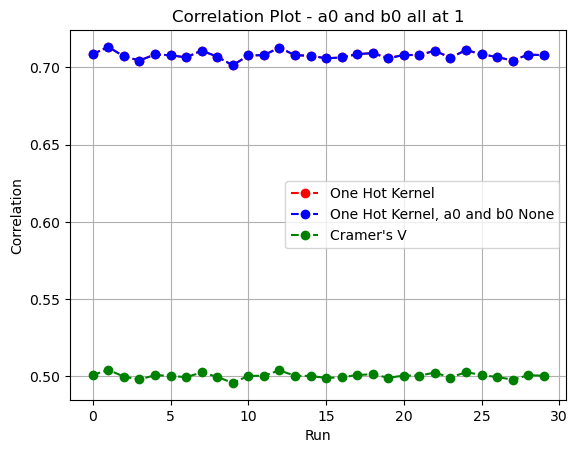

In [70]:
correlations = [res['correlation'] for res in results]
correlations_none = [res['correlation_none'] for res in results]
cramers = [res['cramers_v'] for res in results]

plt.plot(correlations, marker='o', linestyle='--', color='r', label='One Hot Kernel')
plt.plot(correlations_none, marker='o', linestyle='--', color='b', label='One Hot Kernel, a0 and b0 None')
plt.plot(cramers, marker='o', linestyle='--', color='g', label='Cramer\'s V')
plt.title('Correlation Plot - a0 and b0 all at 1')
plt.xlabel('Run')
plt.ylabel('Correlation')
plt.legend()
plt.grid(True)
plt.show()

La correlazione viene comunque calcolata correttamente

## Plot Betas vs Beta none

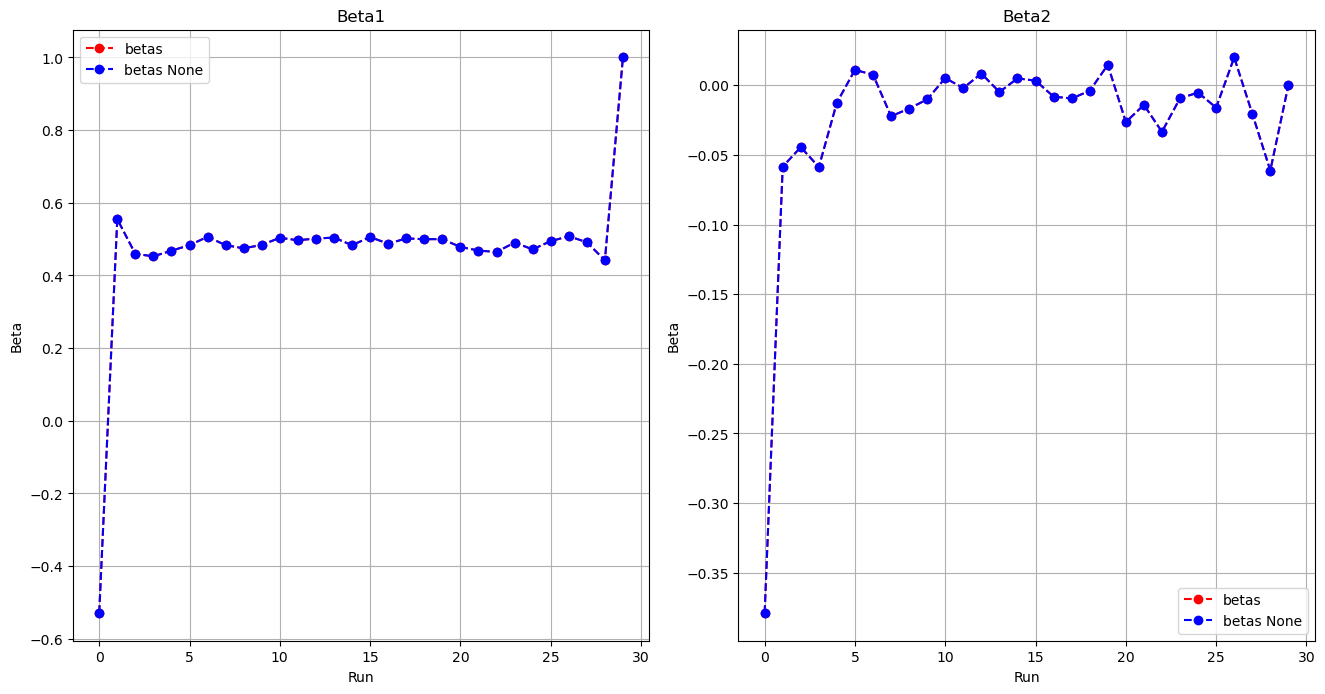

In [87]:
plt.figure(figsize=(20, 20))

for i in range(2):

    betas = [res['beta'][i] for res in results]
    betas_none = [res['beta_none'][i] for res in results]

    plt.subplot(3, 3, i+1)

    plt.plot(betas, marker='o', linestyle='--', color='r', label='betas')
    plt.plot(betas_none, marker='o', linestyle='--', color='b', label='betas None')

    plt.title('Beta' + str(i+1))
    plt.xlabel('Run')
    plt.ylabel('Beta')
    plt.legend()
    plt.grid(True)
plt.tight_layout()
plt.show()

## Plot Alpha vs Alpha none

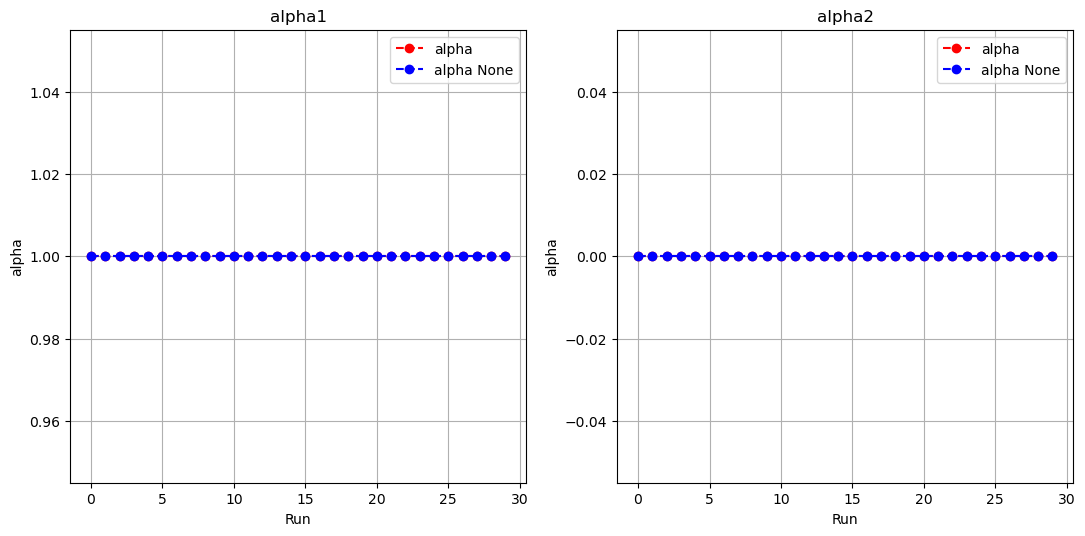

In [89]:
plt.figure(figsize=(20, 20))

for i in range(2):

    alpha = [res['alpha'][i] for res in results]
    alpha_none = [res['alpha_none'][i] for res in results]

    plt.subplot(3, 3, i+1)

    plt.plot(alpha, marker='o', linestyle='--', color='r', label='alpha')
    plt.plot(alpha_none, marker='o', linestyle='--', color='b', label='alpha None')

    plt.title('alpha' + str(i+1))
    plt.xlabel('Run')
    plt.ylabel('alpha')
    plt.legend()
    plt.grid(True)

plt.show()

Per entrambi i coefficienti, uno viene maxato ad 1 mentre l'altro se ne va a 0.

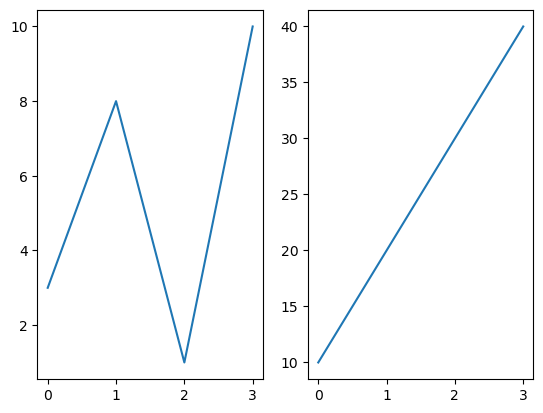

<Figure size 640x480 with 0 Axes>

In [ ]:
x = np.array([0, 1, 2, 3])
y = np.array([3, 8, 1, 10])

plt.subplot(1, 2, 1)
plt.plot(x,y)

#plot 2:
x = np.array([0, 1, 2, 3])
y = np.array([10, 20, 30, 40])

plt.subplot(1, 2, 2)
plt.plot(x,y)

plt.show()
# Adjust layout
plt.tight_layout()

# Display the plots
plt.show()